In [429]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [430]:
%autoreload all

In [431]:
import os

import duckdb
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns
from duckdb import DuckDBPyRelation

from utils.model_evaluation.overall_performance import *
from utils.model_evaluation.client_benefit import *
from utils.model_evaluation.client_contribution import *

sns.set(font_scale=1.25)
sns.set_style('whitegrid')

In [432]:
BASE_DIR = "/home/lukas/Work/Masterthesis/masterthesis-data/"
OUTPUT_DIR = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/plots/"
OUTPUT_TABLES = "/home/lukas/Work/Masterthesis/masterthesis-clustered-fl/output/tables.tex"

In [433]:
if os.path.exists(OUTPUT_TABLES) and os.path.isfile(OUTPUT_TABLES):
    os.remove(OUTPUT_TABLES)

In [434]:
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [435]:
def connect_to_run(run_id: str) -> duckdb.DuckDBPyConnection:
    full_path = os.path.join(BASE_DIR, run_id + ".db")
    if not os.path.exists(full_path):
        raise Exception(f"No database found for run {run_id} at path {full_path}")
    return duckdb.connect(str(full_path))

In [436]:
SQL_FULL = """
SELECT *
FROM configurations
NATURAL JOIN metrics
NATURAL JOIN data_distributions
NATURAL JOIN infos
"""

def get_run_relation(conn: duckdb.DuckDBPyConnection) -> duckdb.DuckDBPyRelation:
    return conn.sql(SQL_FULL)

In [437]:
def log_table(df: pd.DataFrame, name: str) -> pd.DataFrame:
    with open(OUTPUT_TABLES, "a") as f:
        f.write(f"======= {name} =======\n")
        f.write(df.to_latex(float_format="%.3f"))
        f.write("\n\n")
    return df

# Runs

Each run/imbalance combination is in a different db file:

In [438]:
BENEFIT_QUANTITY_CIFAR = "20240523_095552"
BENEFIT_LABEL_DISTRIBUTION_CIFAR = "20240508_164642"
BENEFIT_FEATURE_DISTRIBUTION_CIFAR = "20240521_112838"
BENEFIT_QUANTITY_MNIST = "20240525_142650"
BENEFIT_LABEL_DISTRIBUTION_MNIST = "20240515_143650"
BENEFIT_FEATURE_DISTRIBUTION_MNIST = "20240522_092910"

CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR = "20240608_201758"
CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST = "20240609_091903"

# Overall Model Training

## Quantity Imbalance

### CIFAR-10

In [439]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

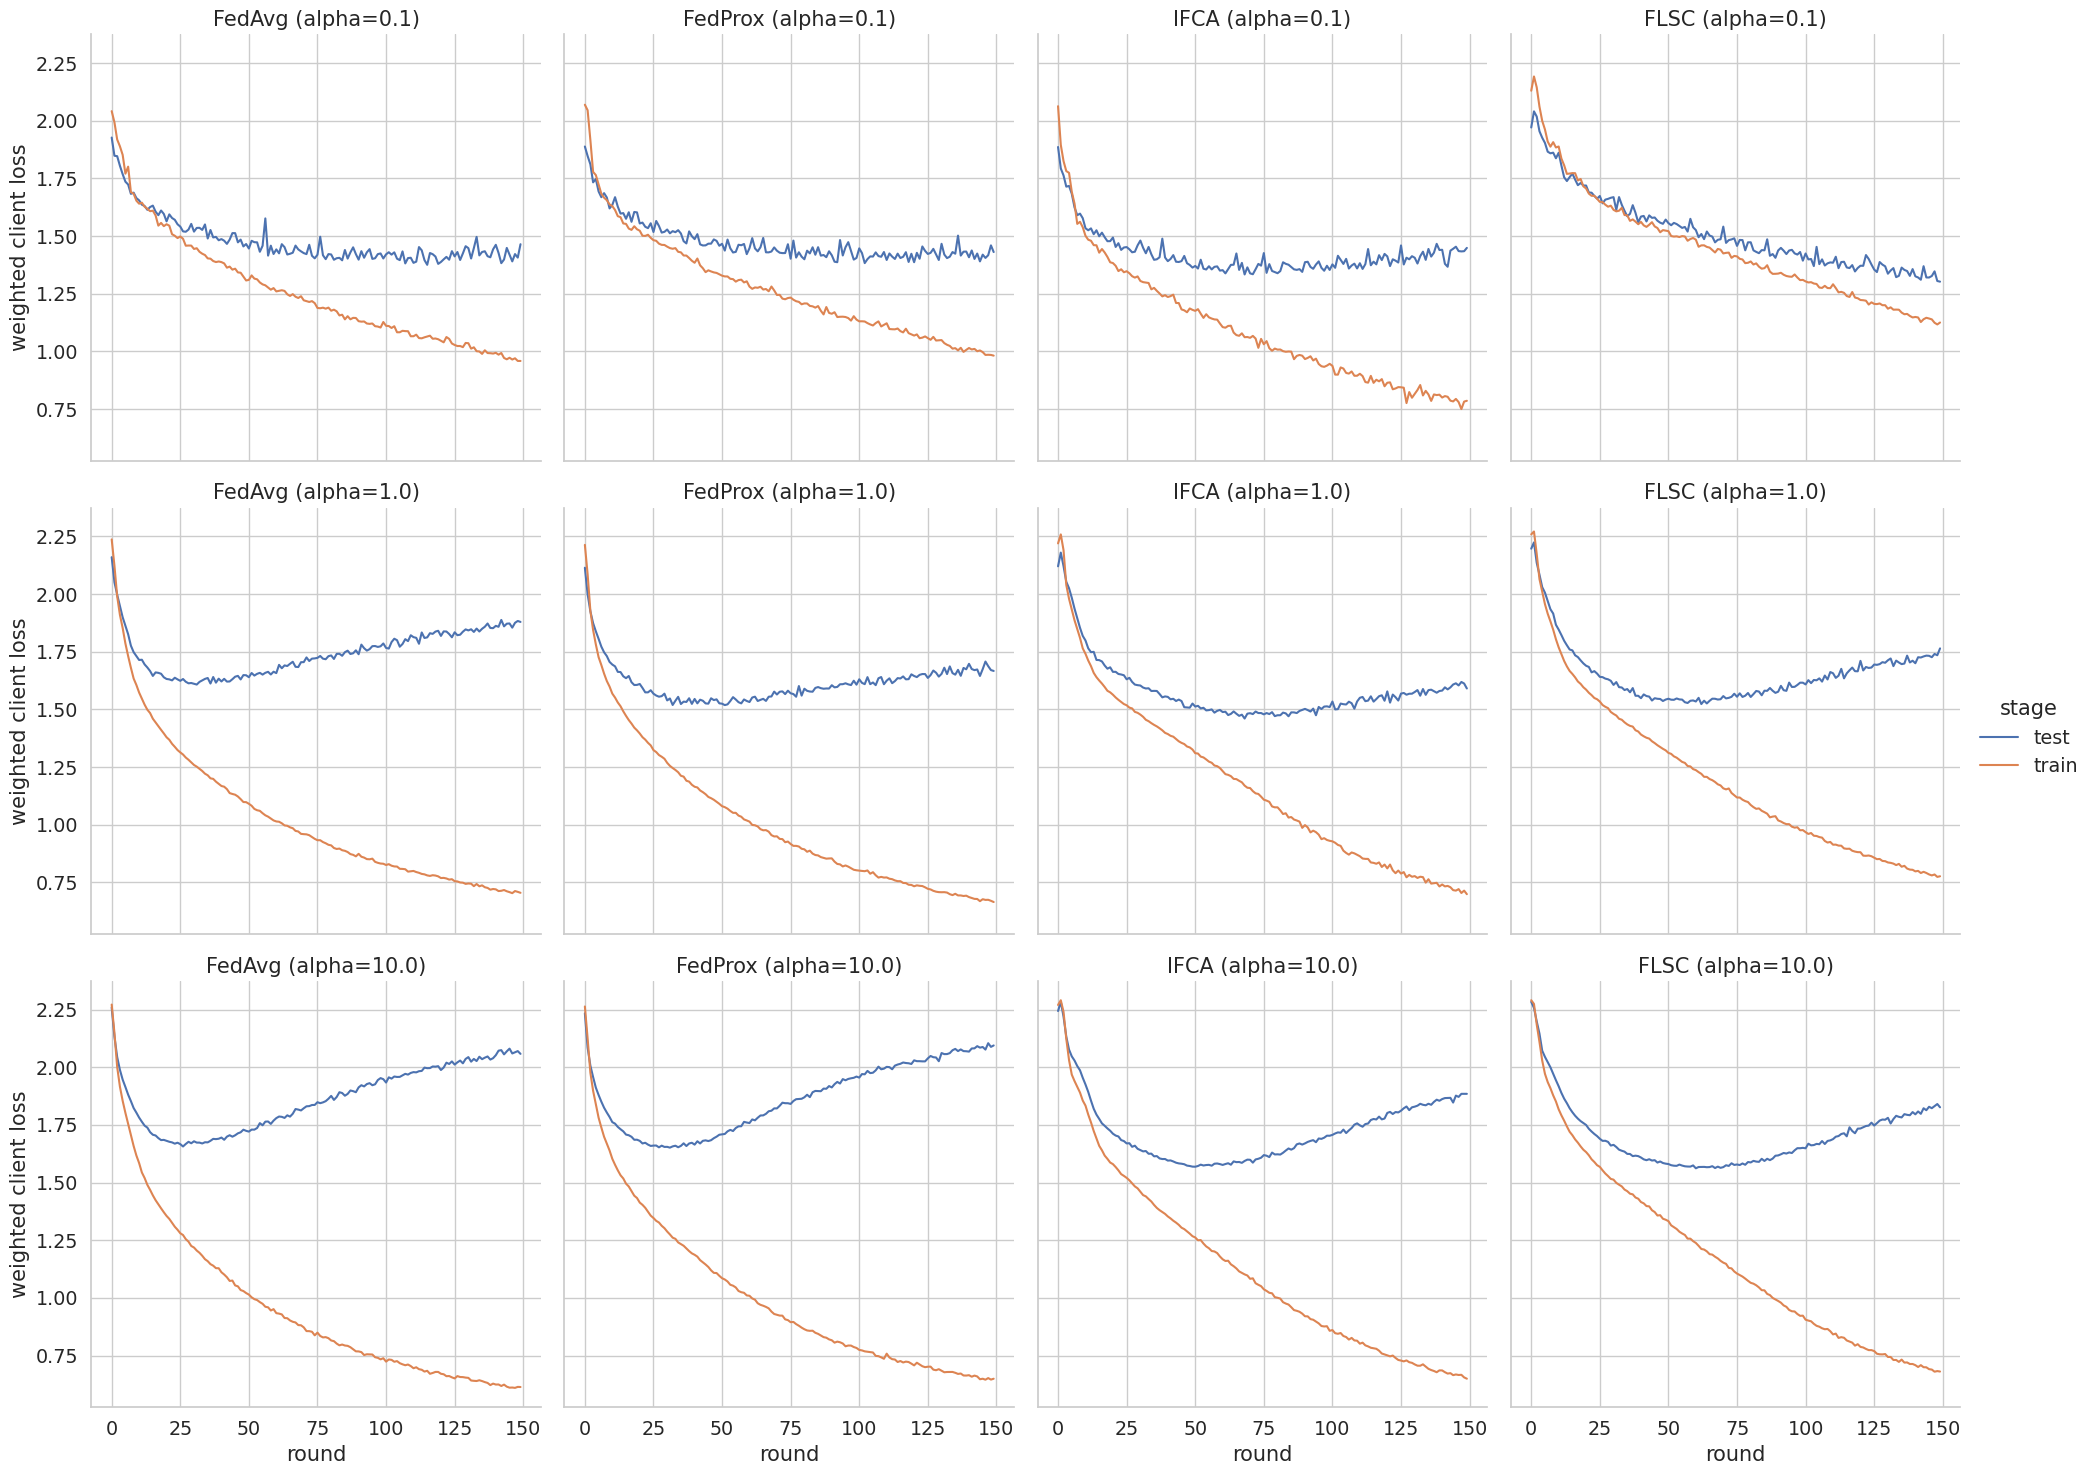

In [440]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_quantity_imbalance.png"))

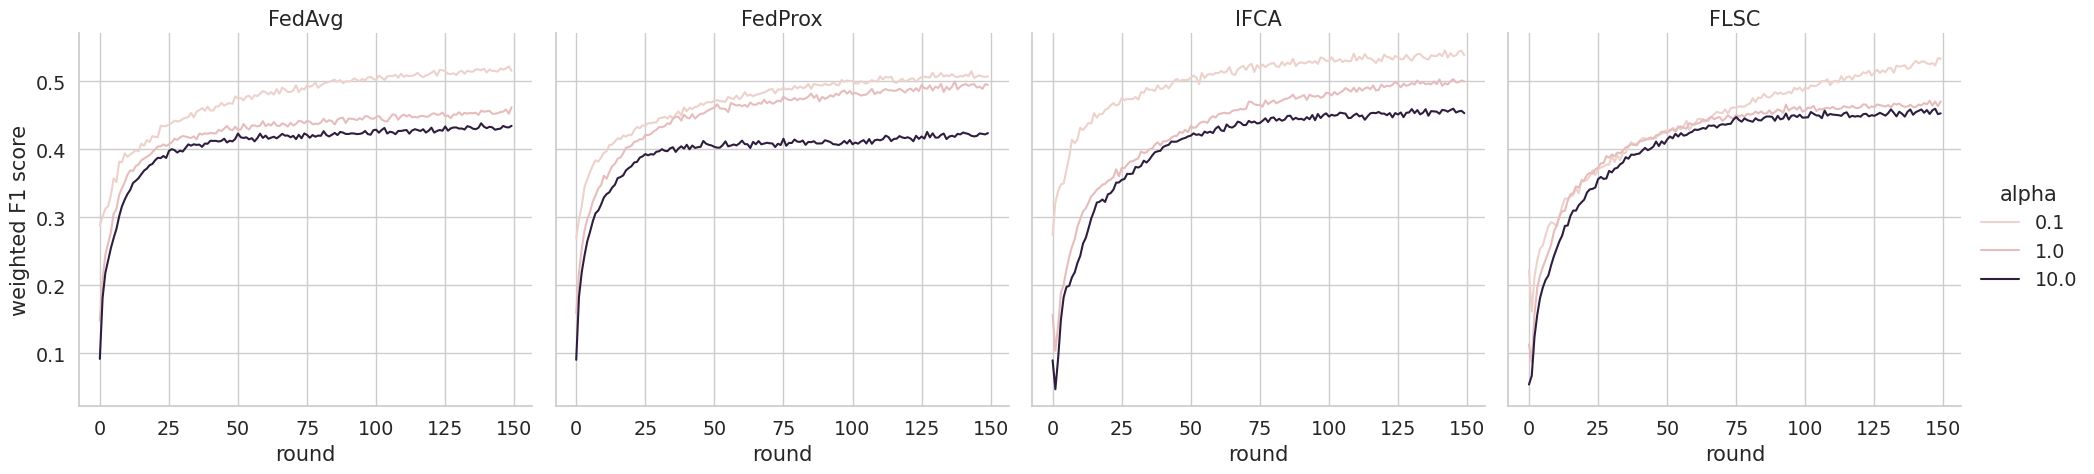

In [441]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_quantity_imbalance.png"))

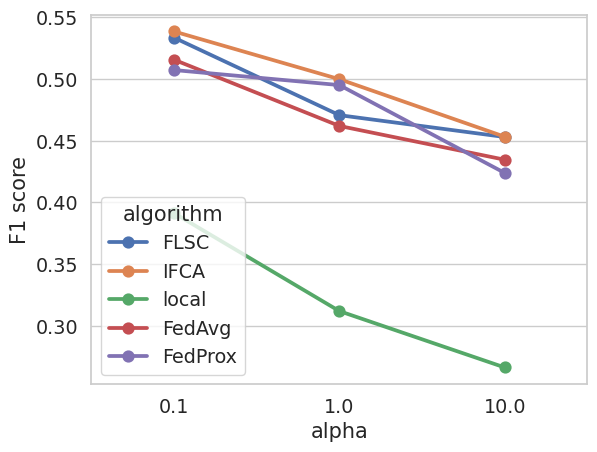

In [442]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_quantity_imbalance.png"))

In [443]:
conn.close()

### MNIST

In [444]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

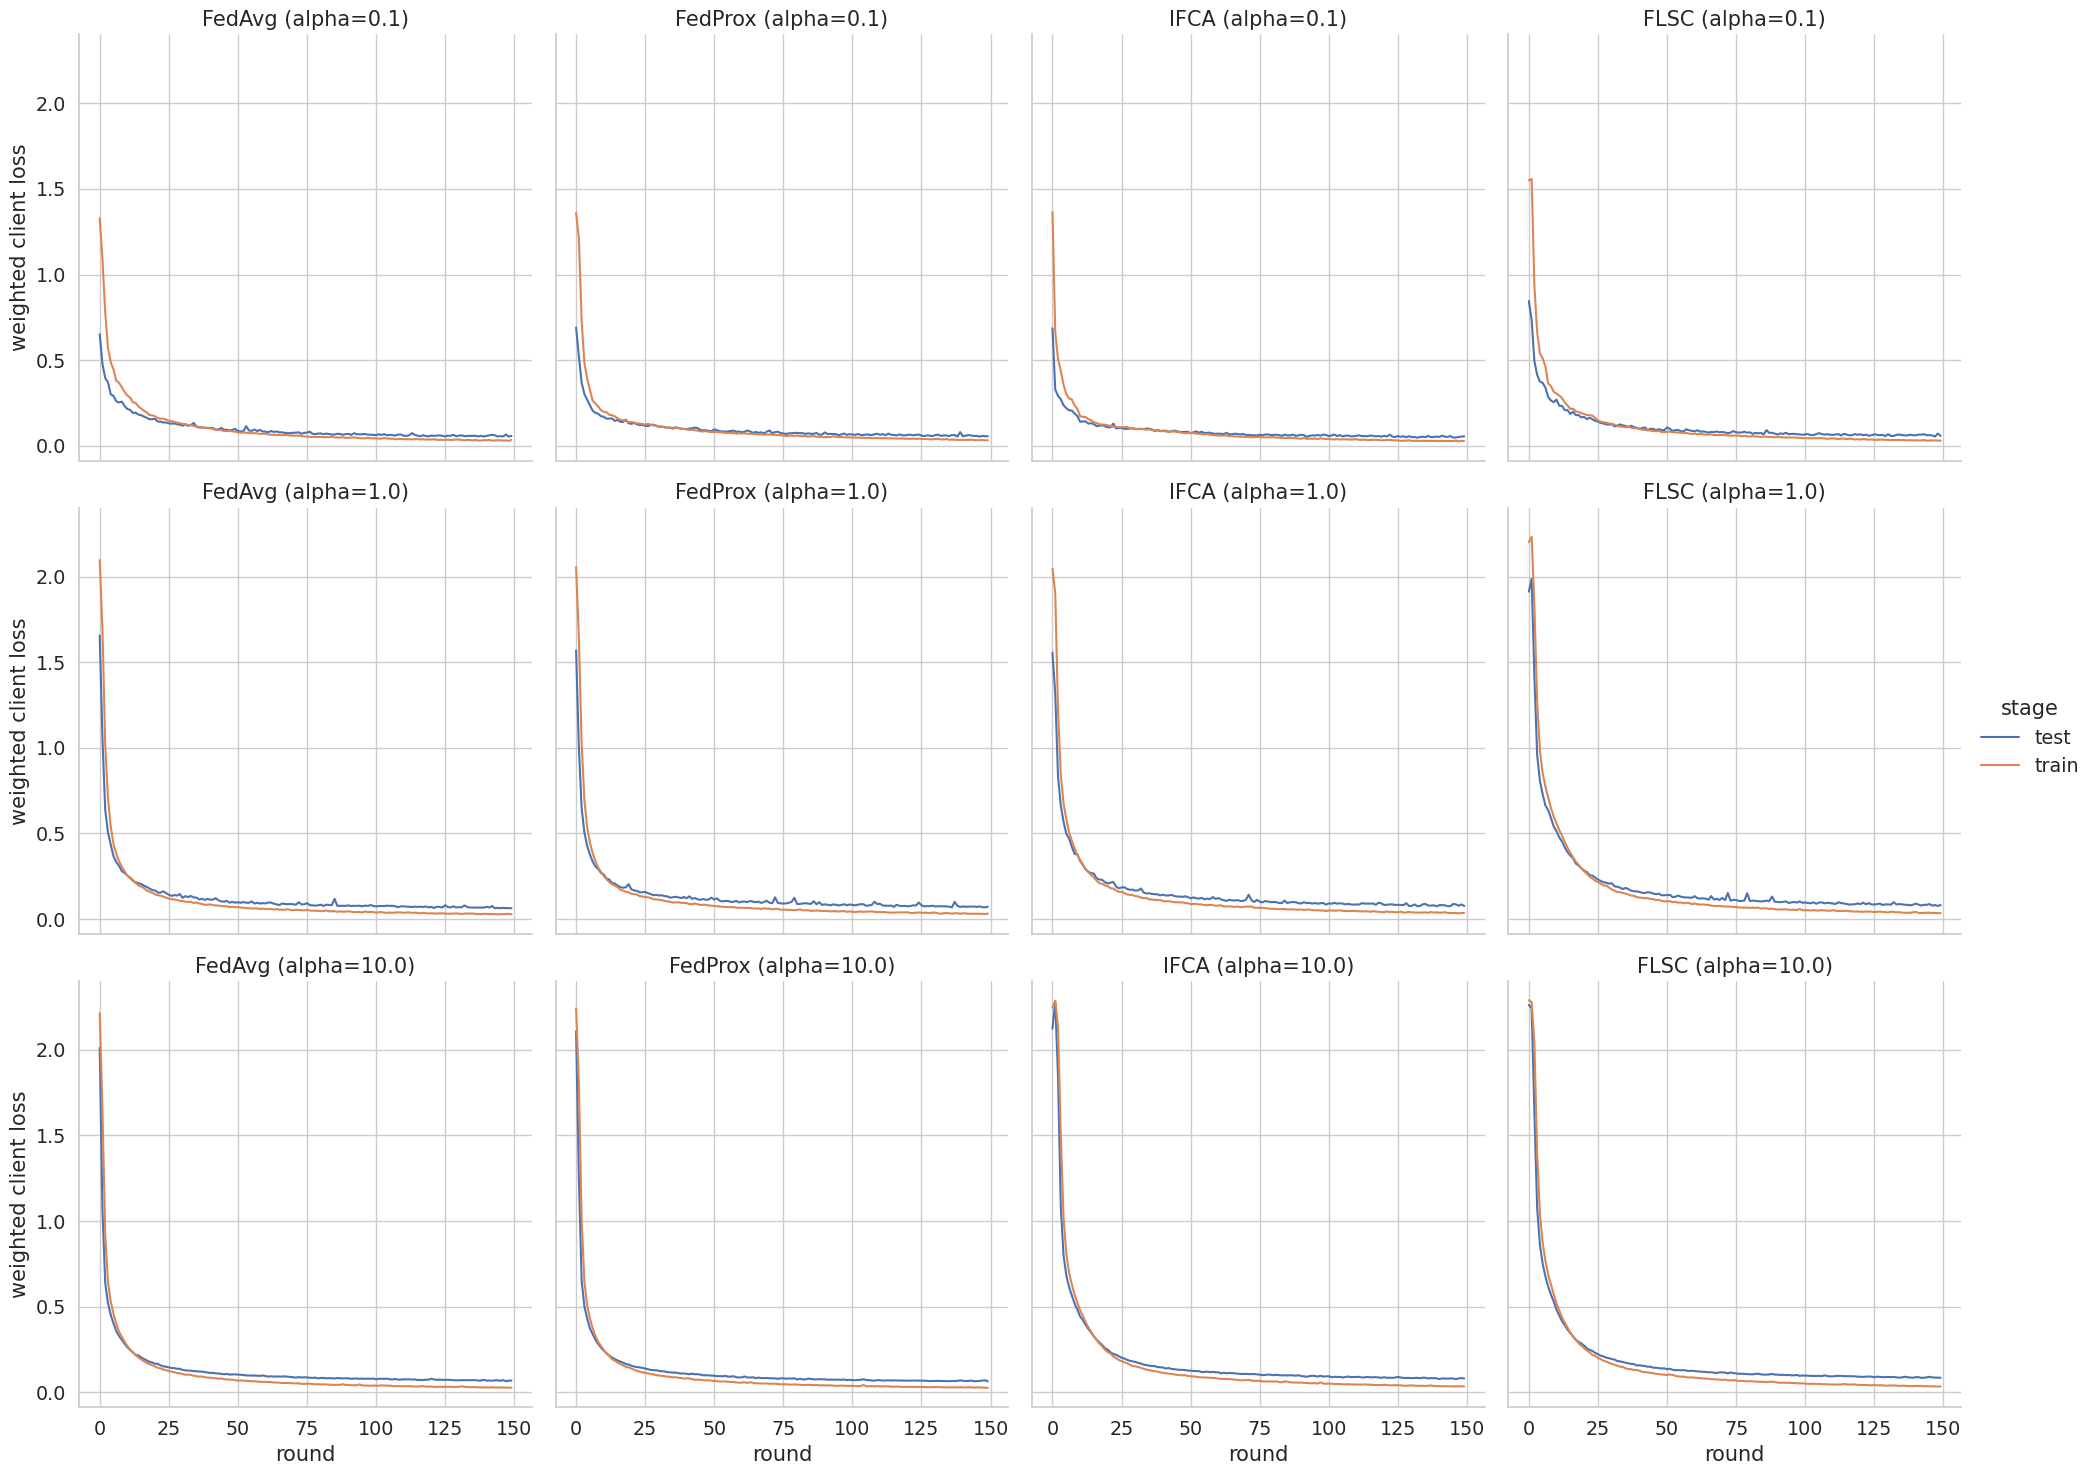

In [445]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_quantity_imbalance.png"))

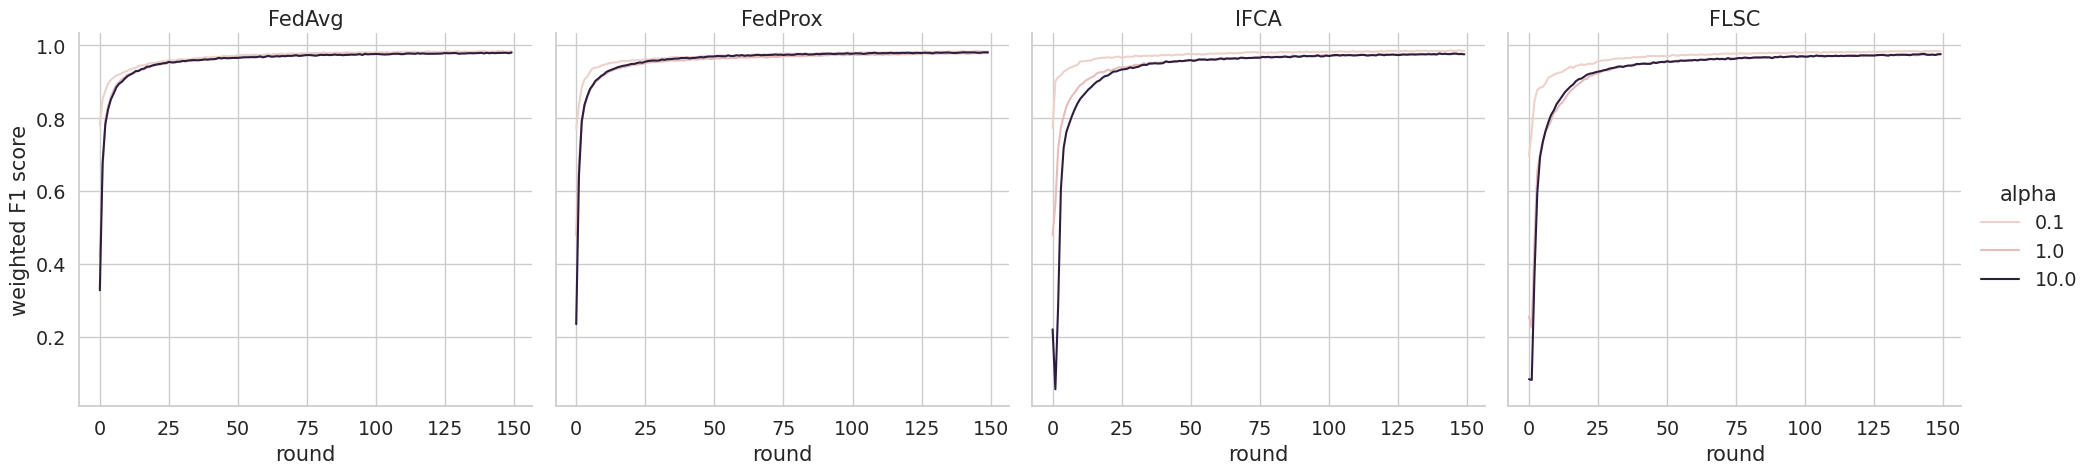

In [446]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_quantity_imbalance.png"))

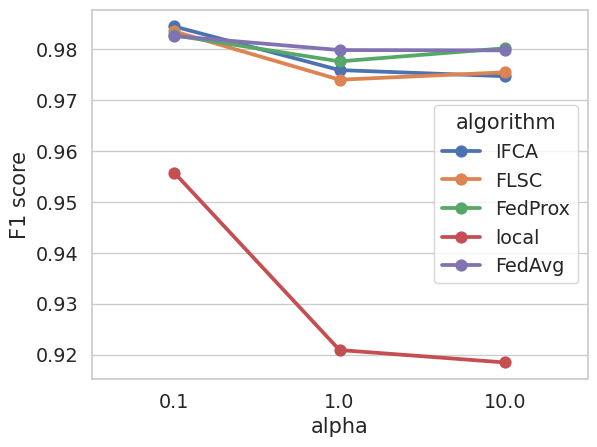

In [447]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_quantity_imbalance.png"))

In [448]:
conn.close()

## Label (Distribution) Imbalance

### CIFAR-10

In [449]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

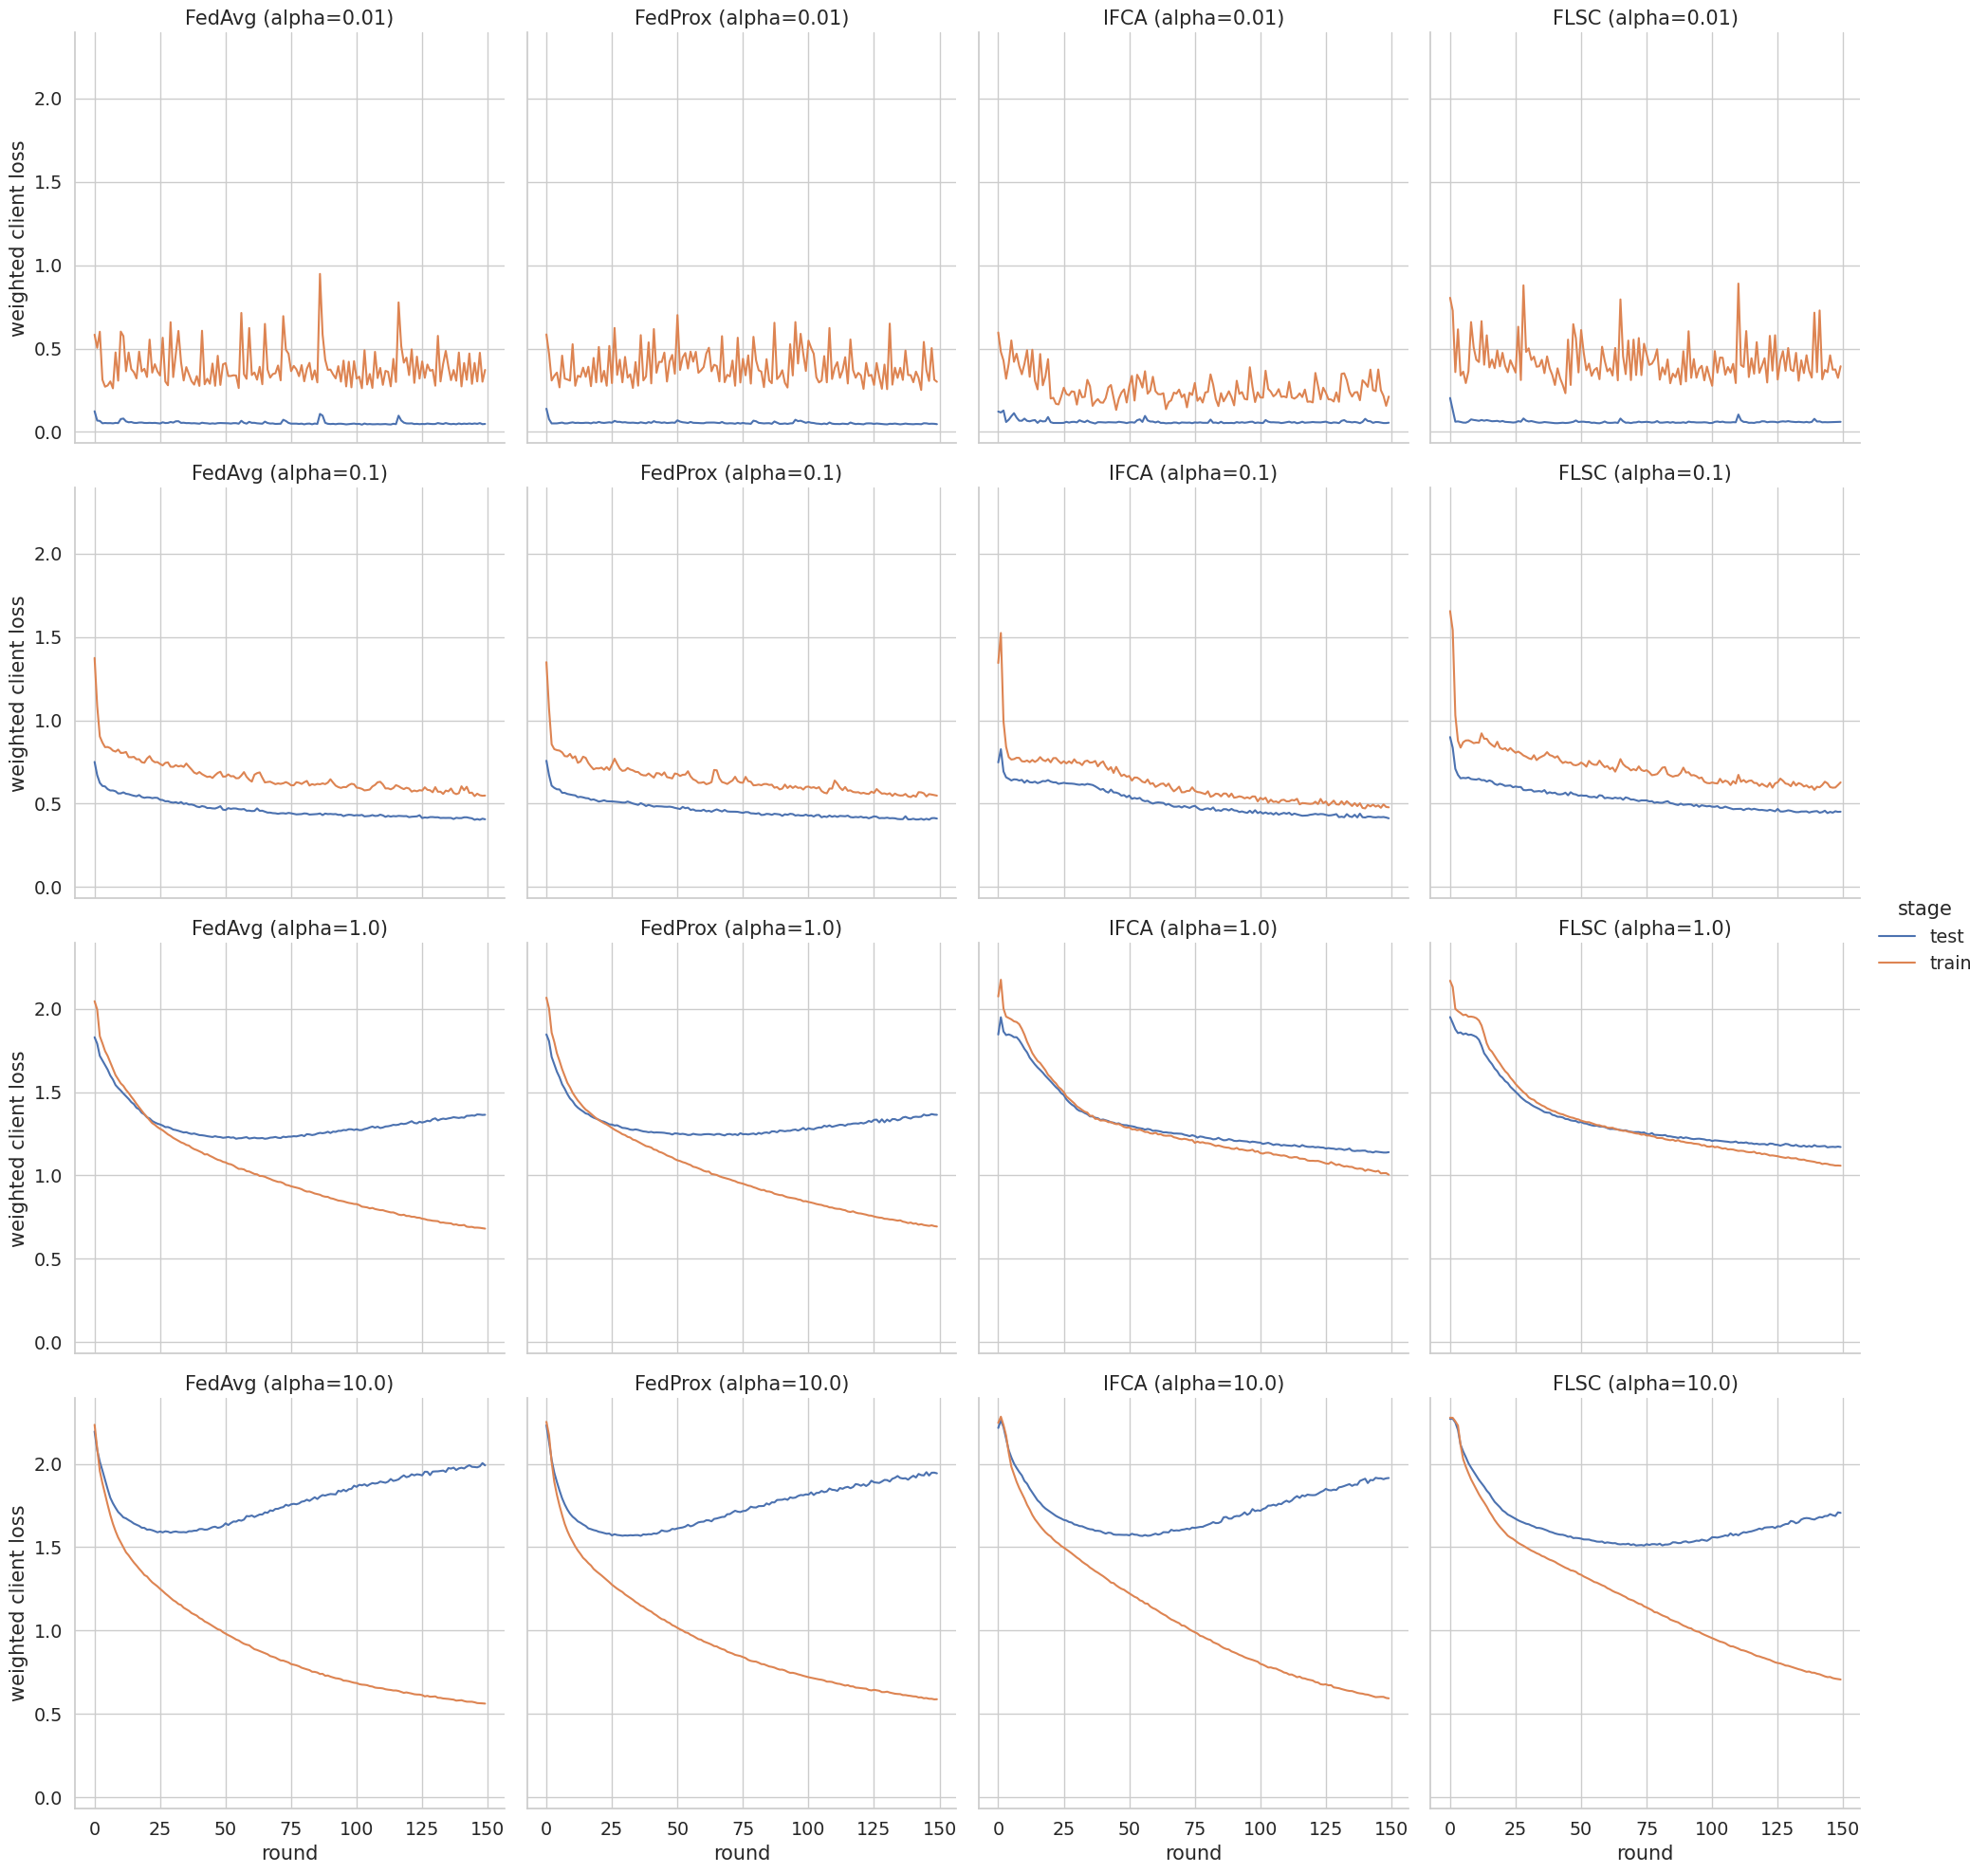

In [450]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_label_distribution_imbalance.png"))

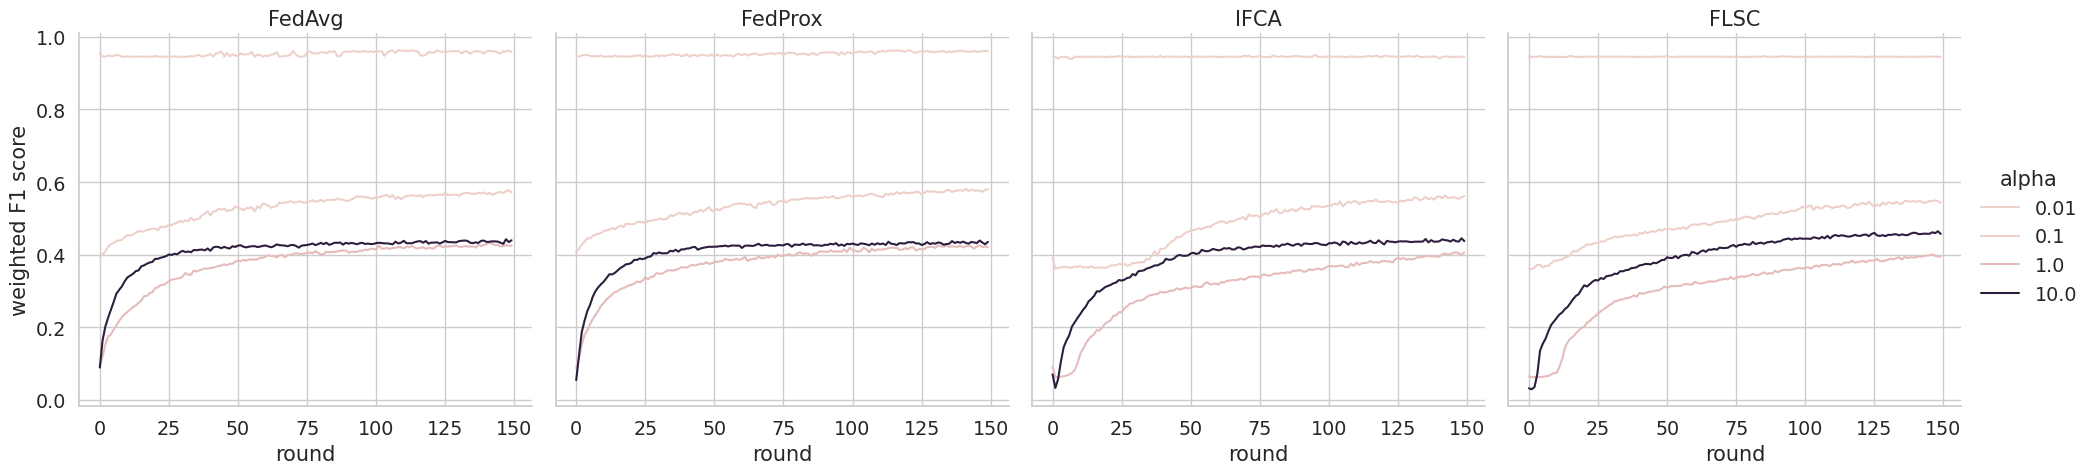

In [451]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_label_distribution_imbalance.png"))

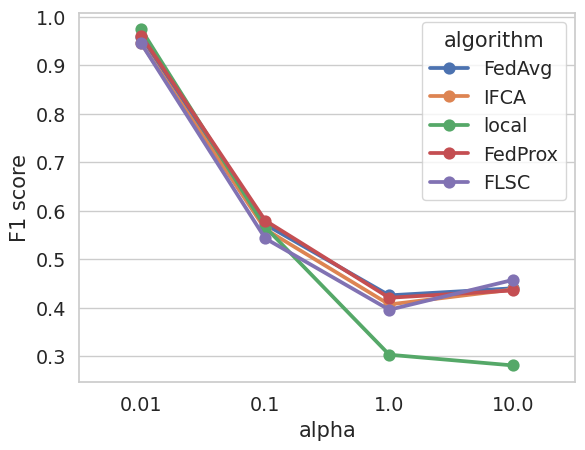

In [452]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_label_distribution_imbalance.png"))

In [453]:
conn.close()

### MNIST

In [454]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

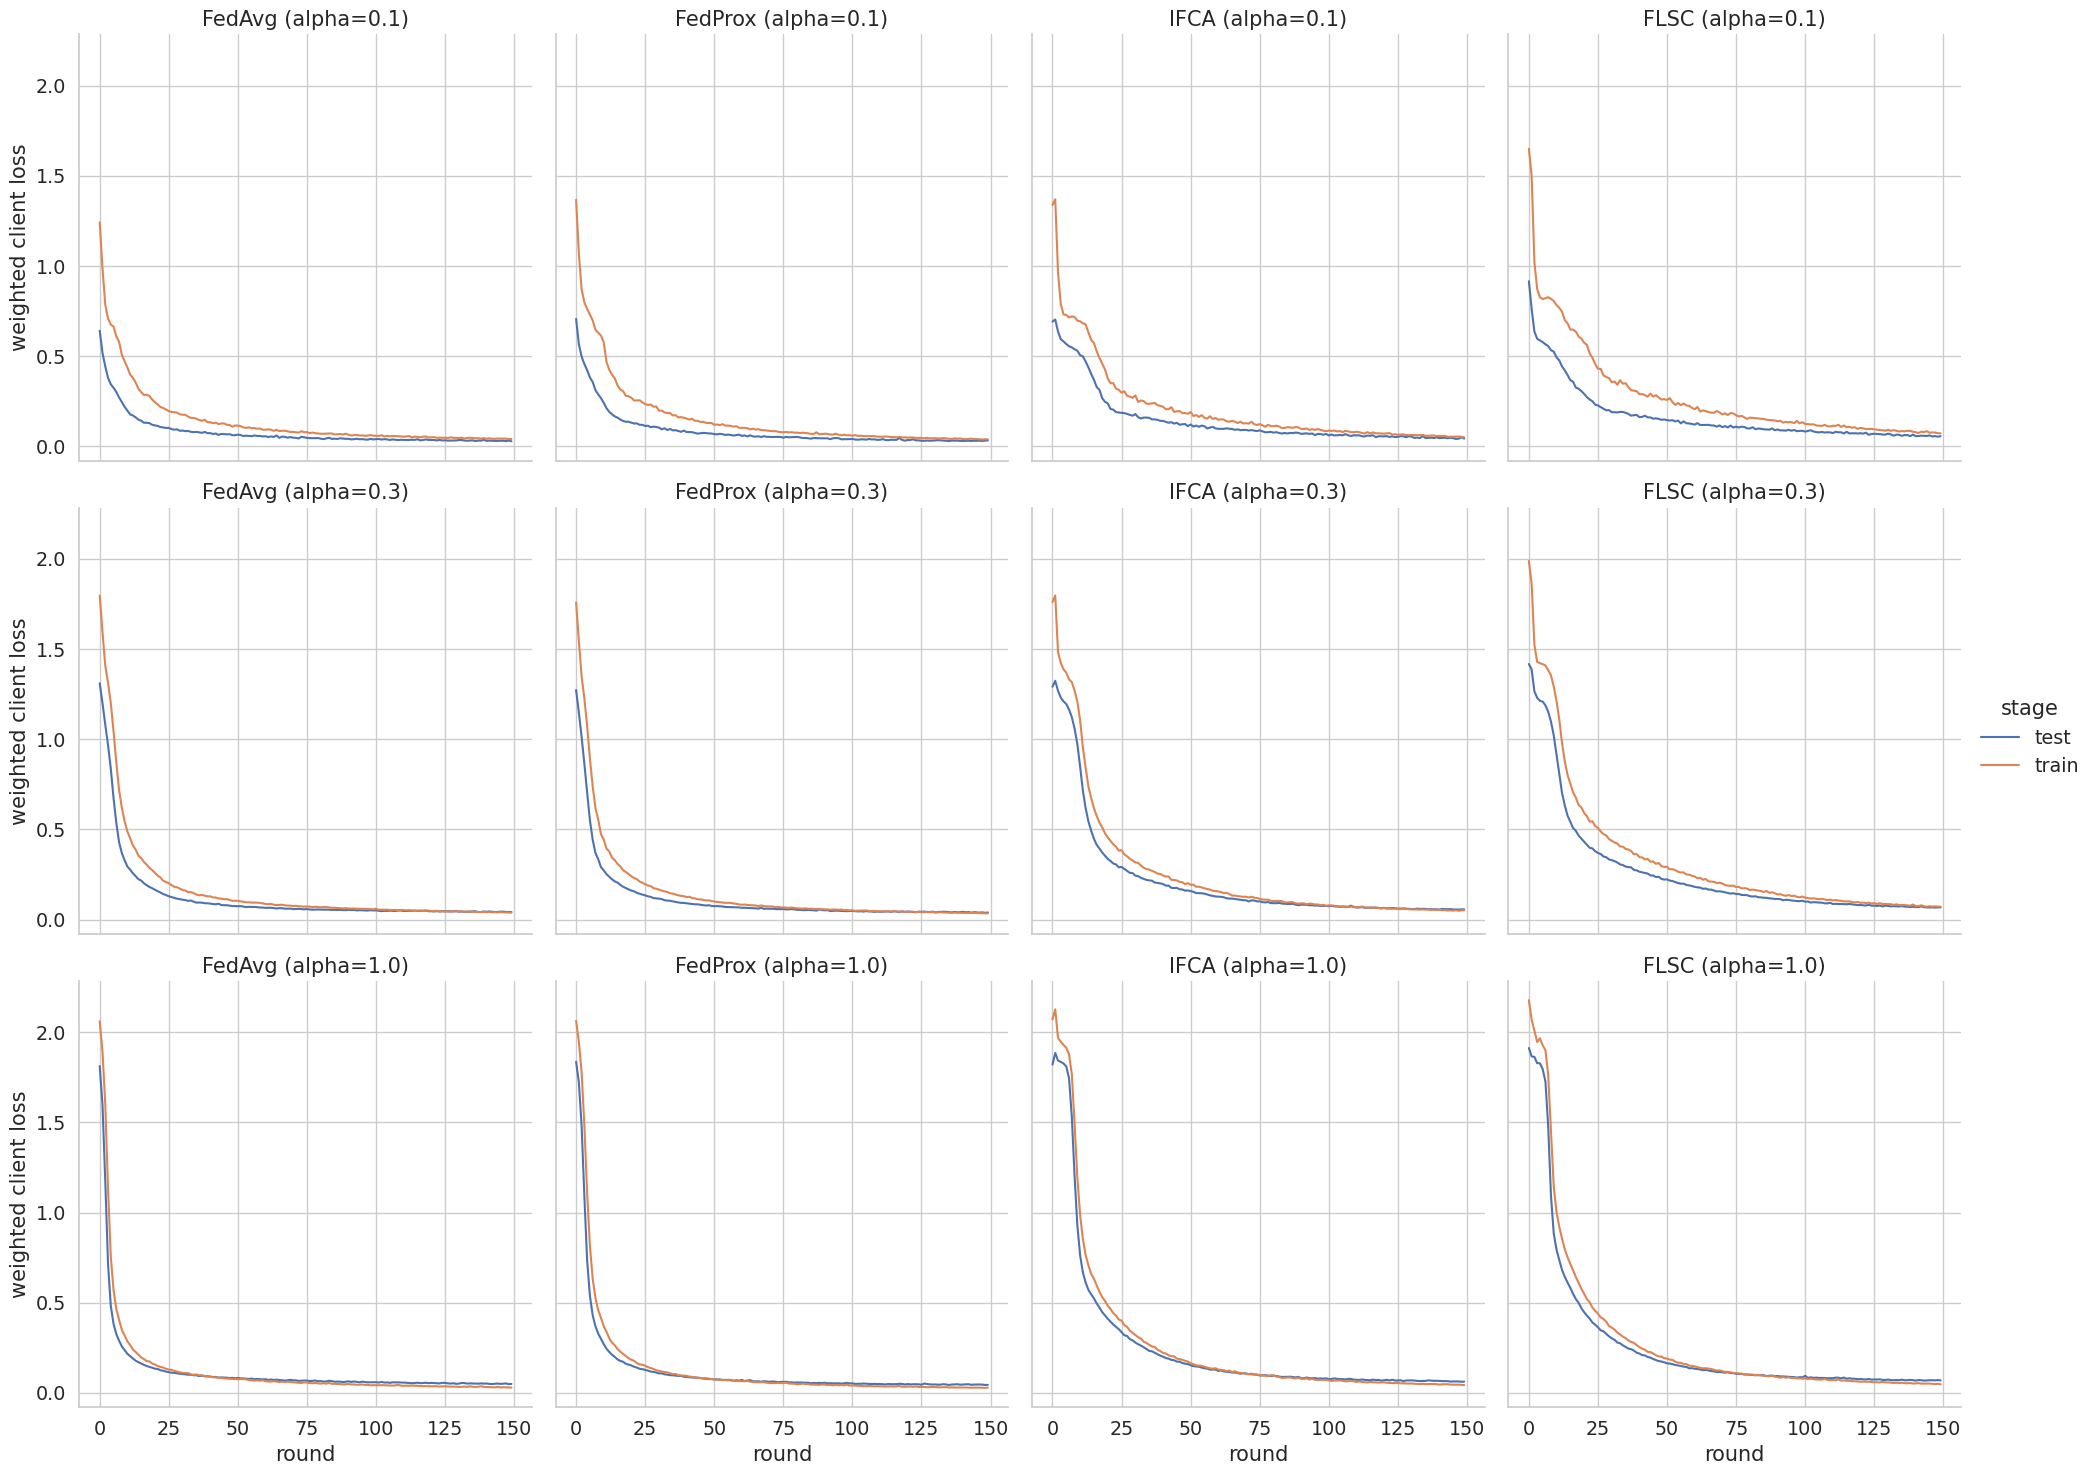

In [455]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_label_distribution_imbalance.png"))

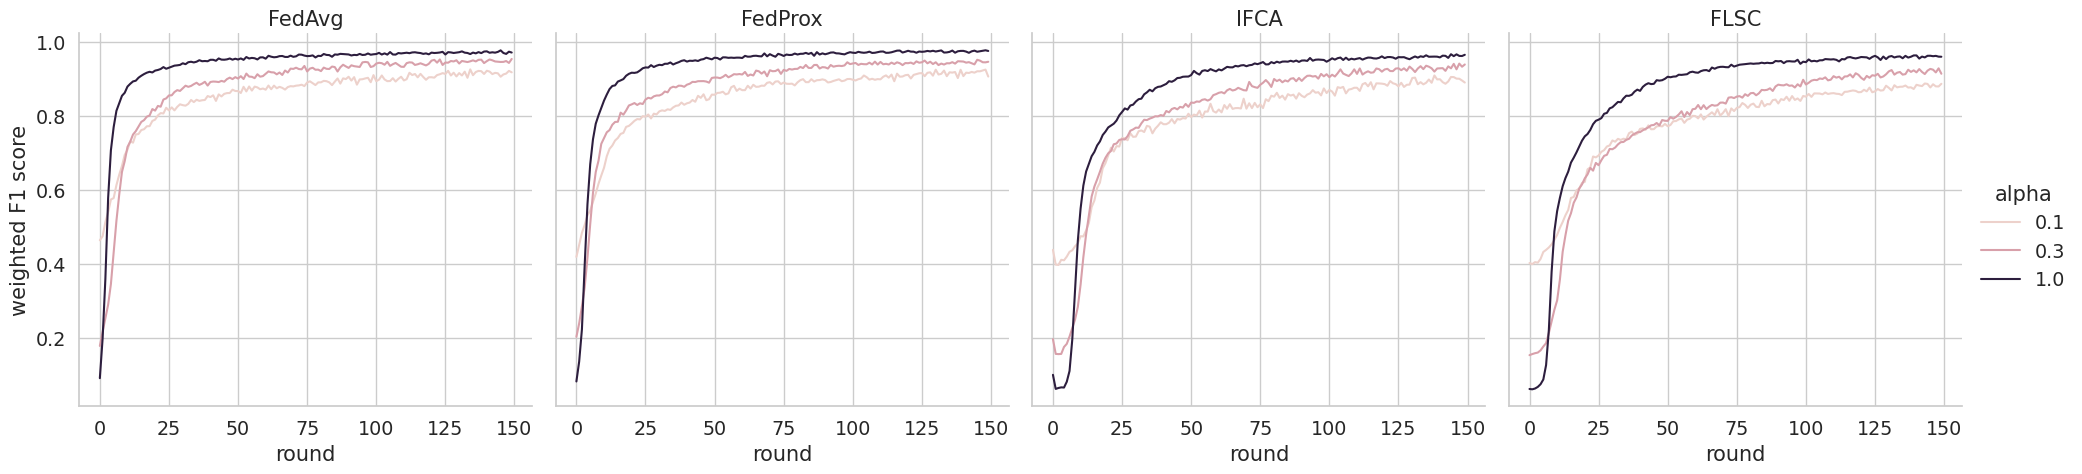

In [456]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_label_distribution_imbalance.png"))

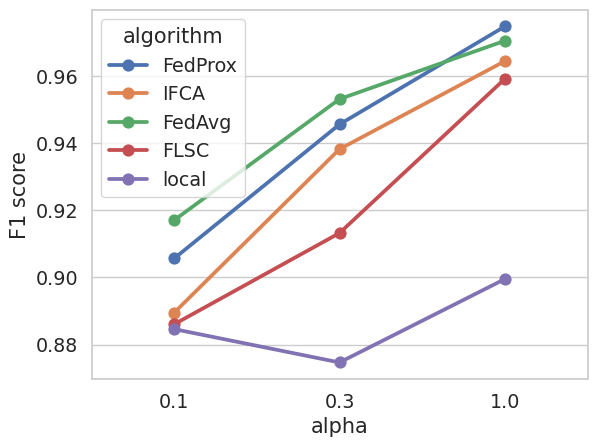

In [457]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_label_distribution_imbalance.png"))

In [458]:
conn.close()

## Feature (Distribution) Imbalance

### CIFAR-10

In [459]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

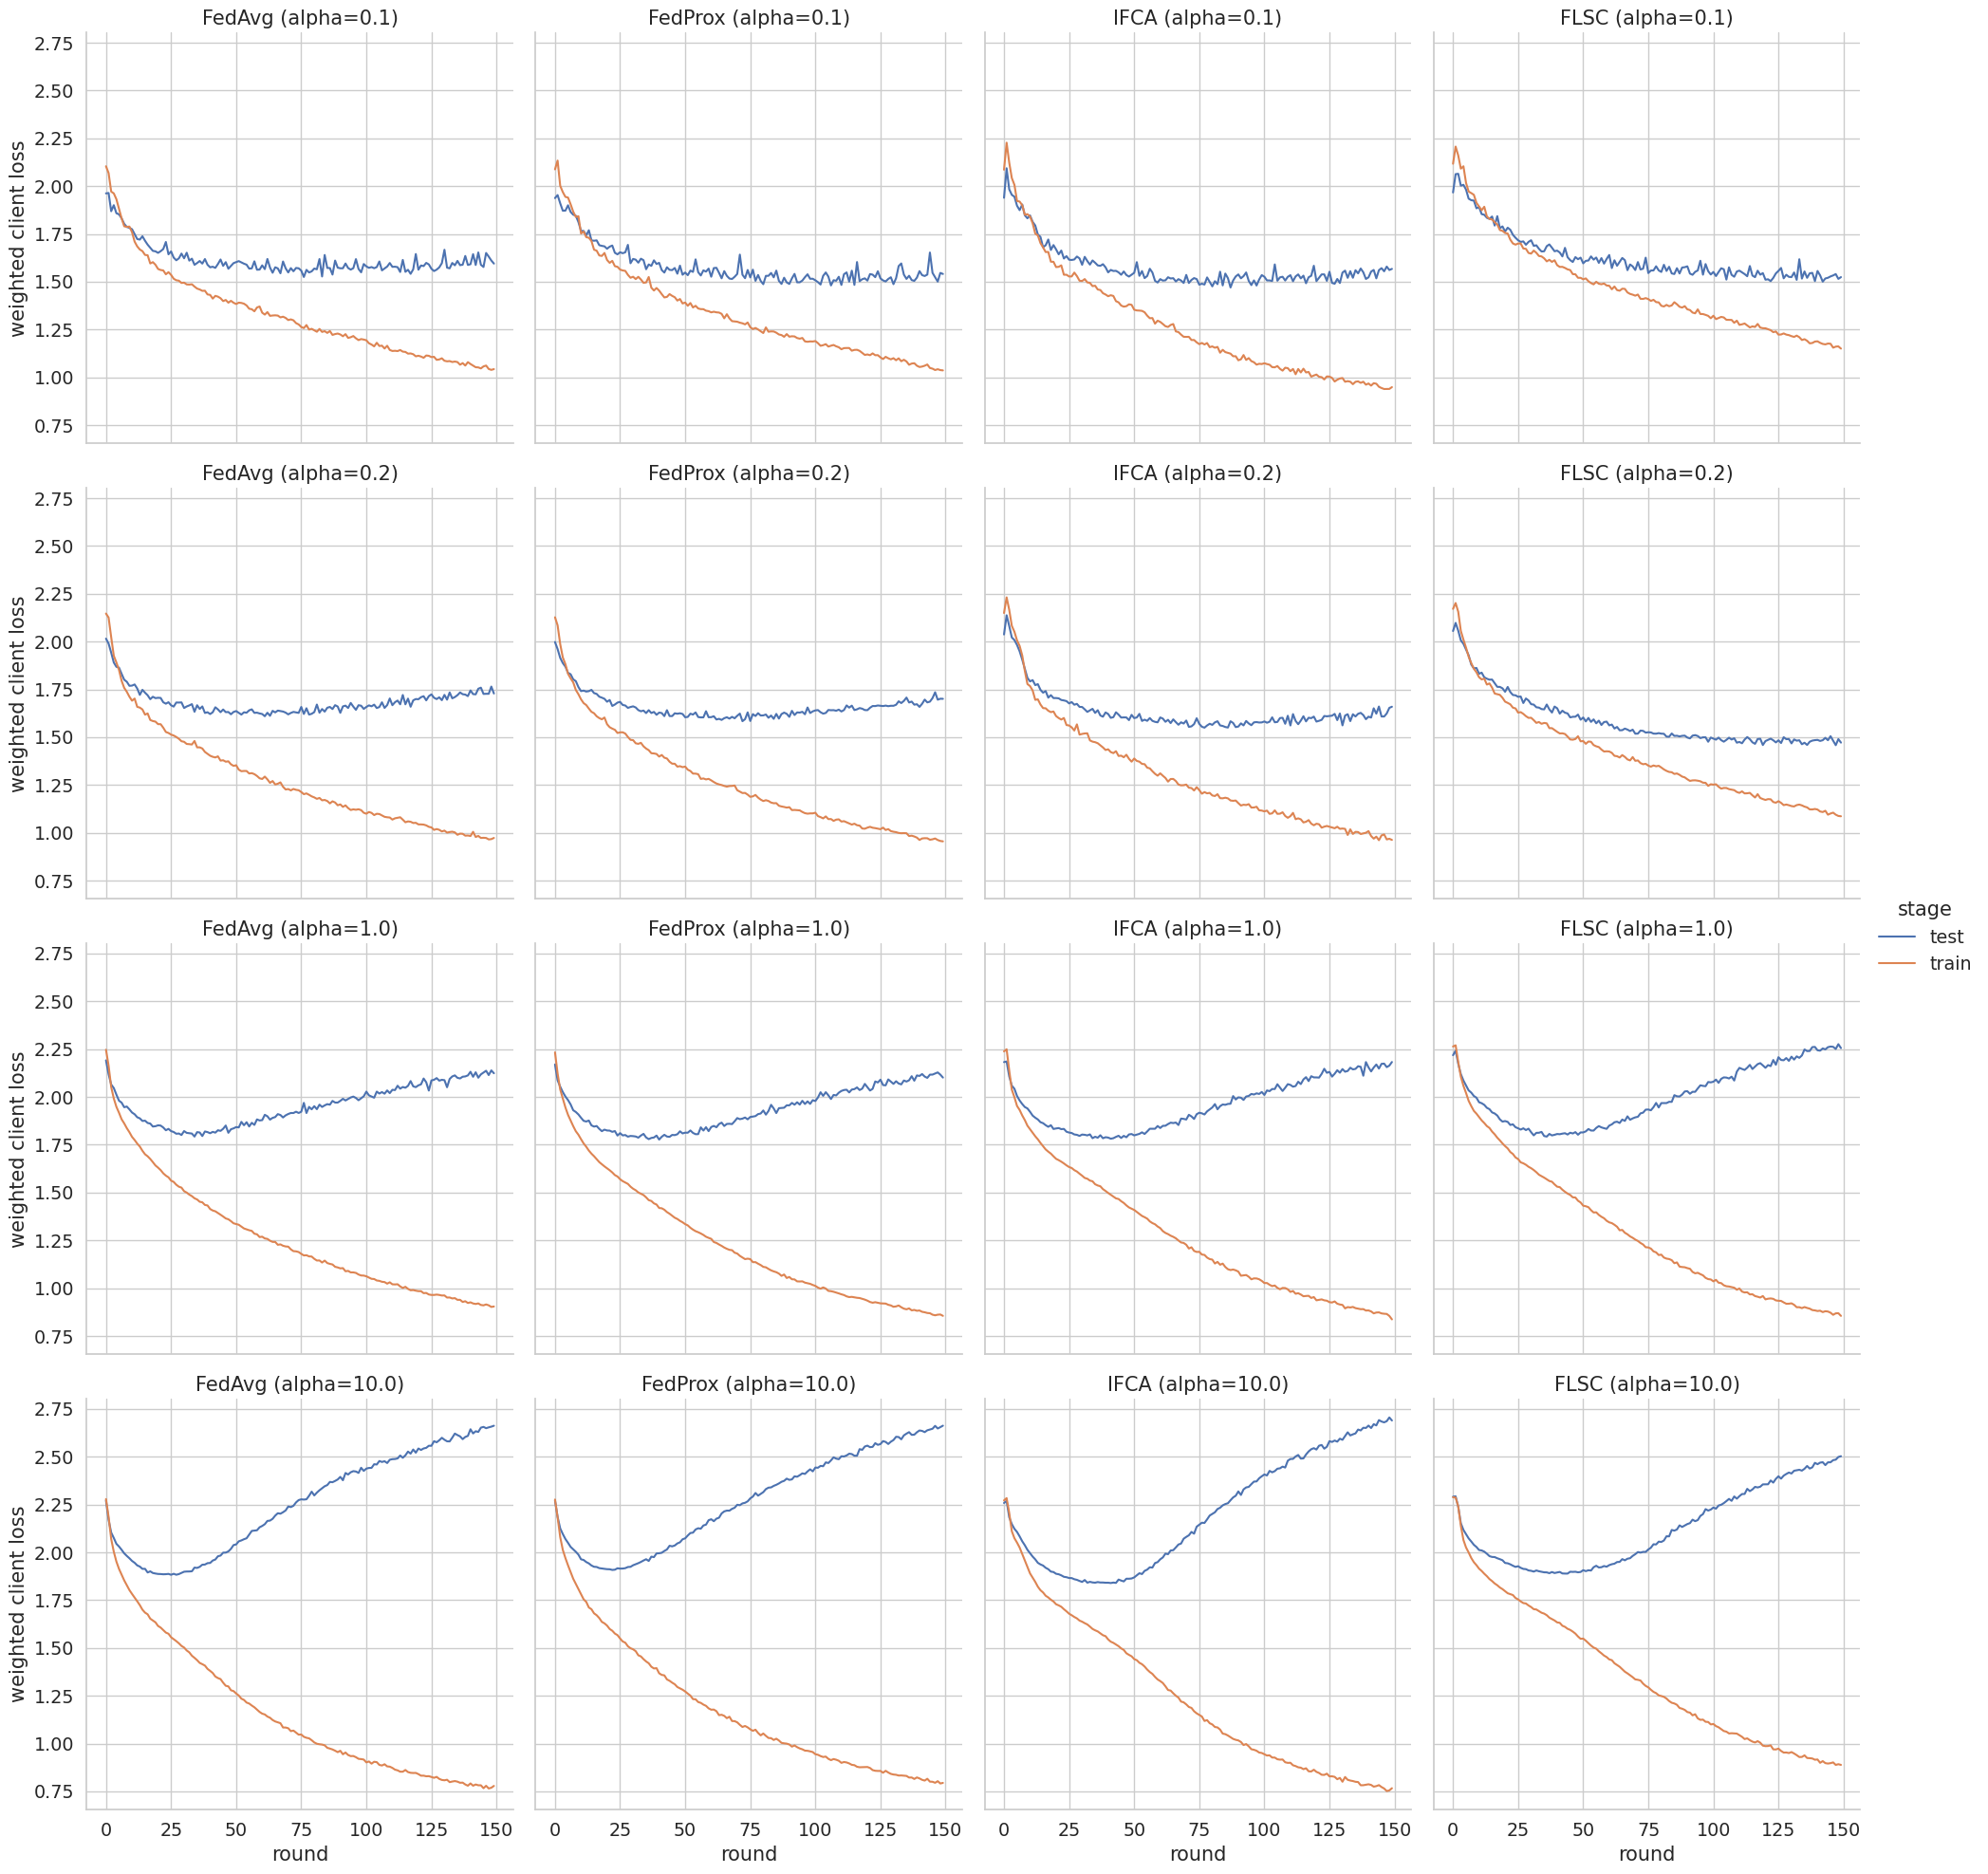

In [460]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_cifar10_feature_distribution_imbalance.png"))

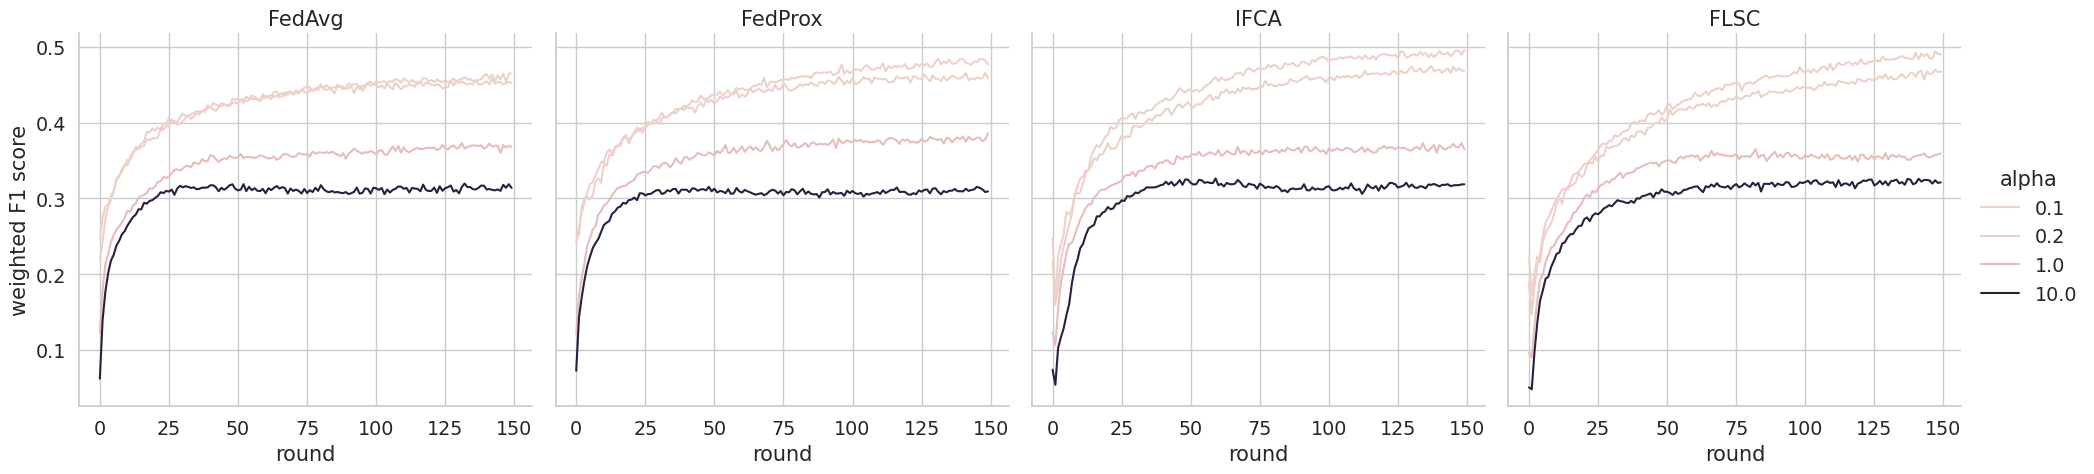

In [461]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_cifar10_feature_distribution_imbalance.png"))

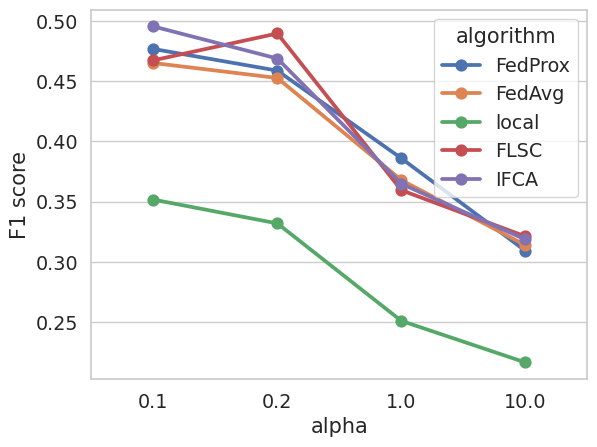

In [462]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_cifar10_feature_distribution_imbalance.png"))

In [463]:
conn.close()

### MNIST

In [464]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

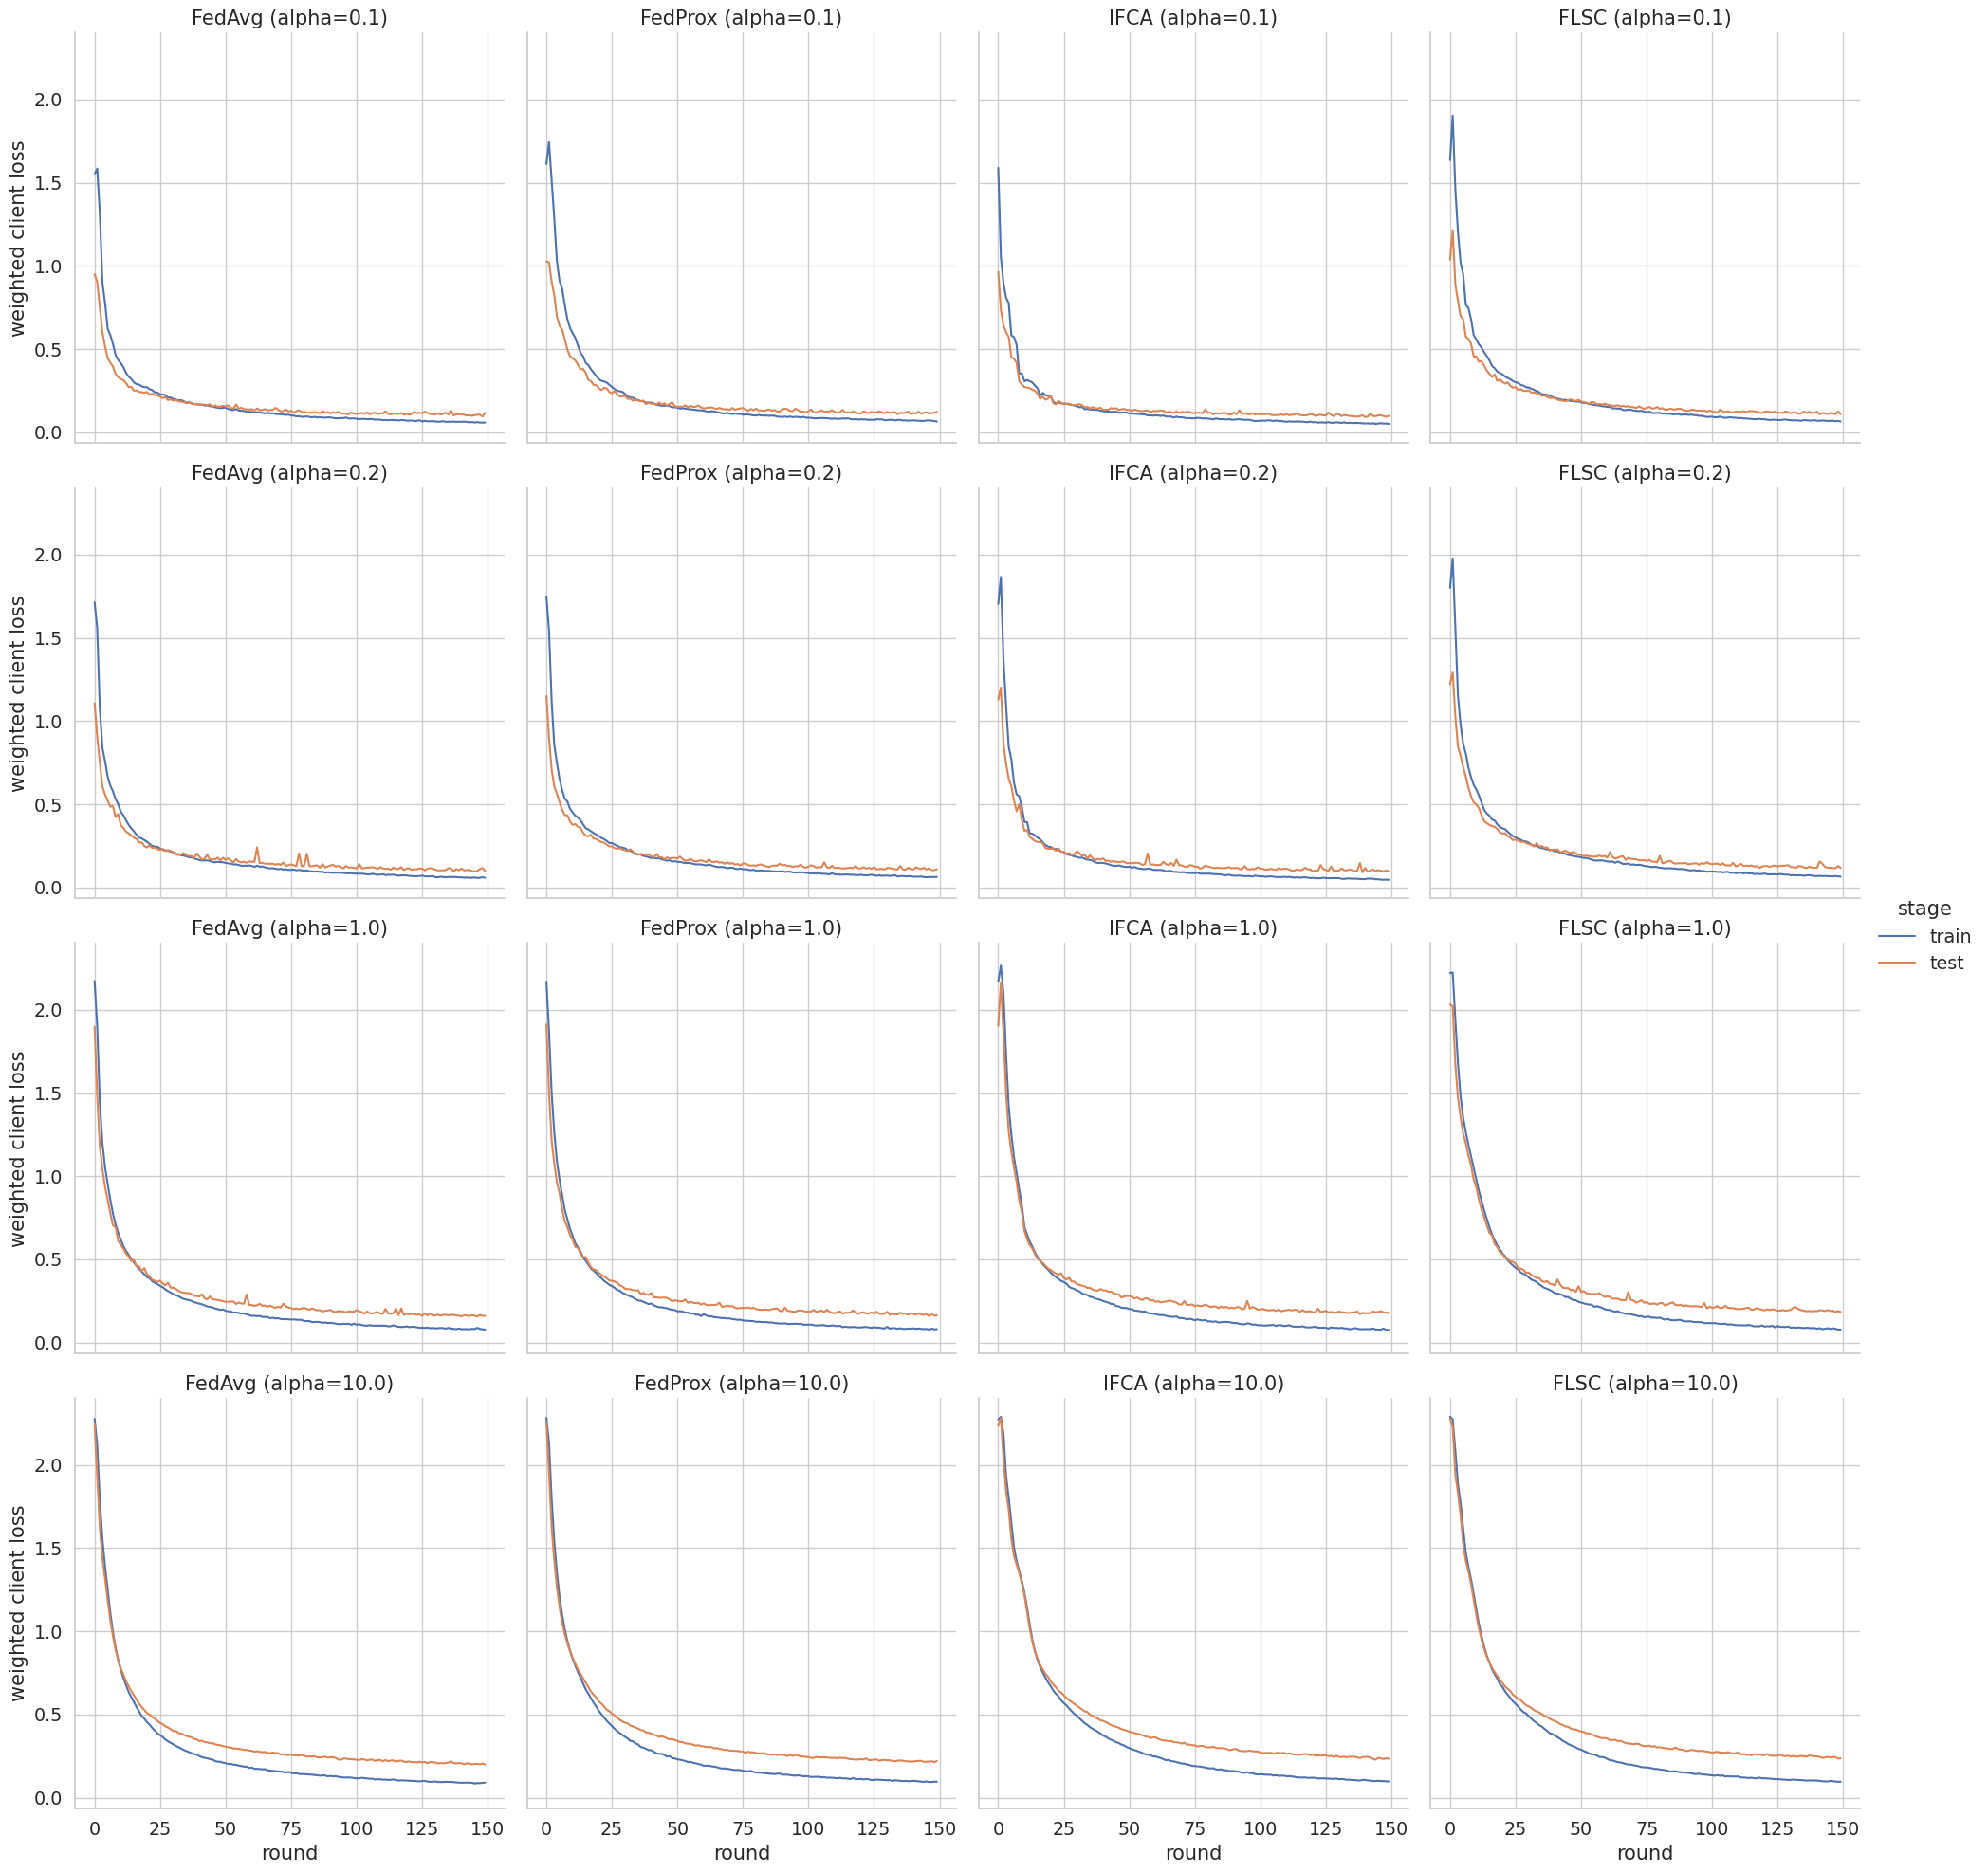

In [465]:
loss_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "losses_mnist_feature_distribution_imbalance.png"))

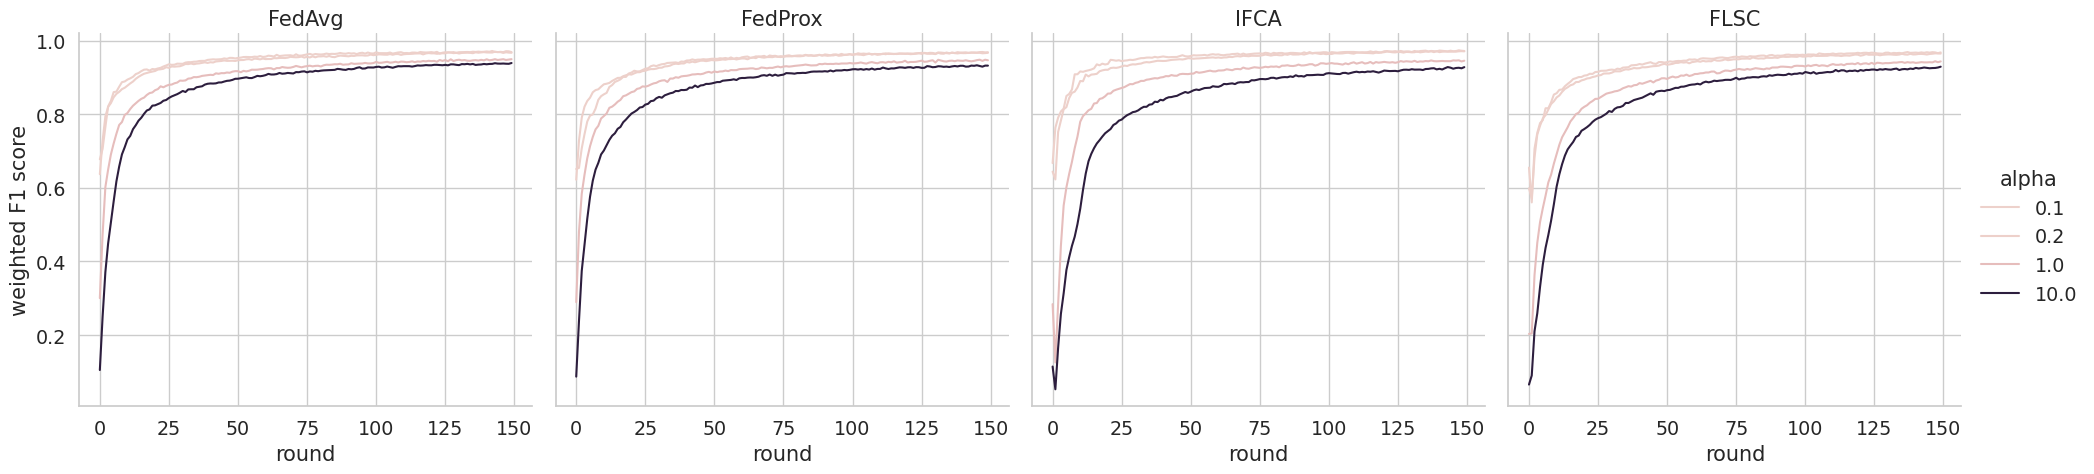

In [466]:
f1_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "f1scores_mnist_feature_distribution_imbalance.png"))

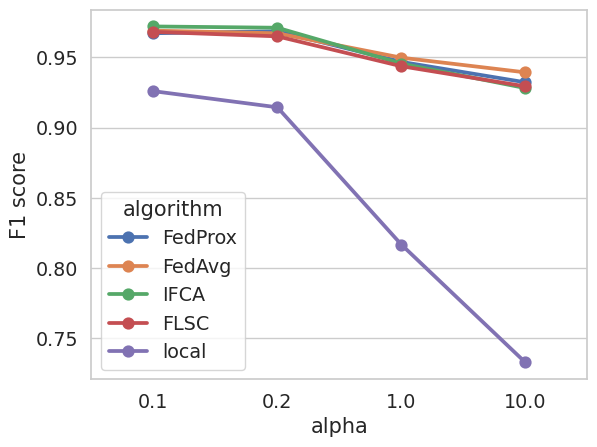

In [467]:
overall_f1_vs_imbalance_plots(conn, data, weighted=True).savefig(os.path.join(OUTPUT_DIR, "final_f1scores_mnist_feature_distribution_imbalance.png"))

In [468]:
conn.close()

# Client Benefit

## Quantity Imbalance

### CIFAR-10

In [469]:
conn = connect_to_run(BENEFIT_QUANTITY_CIFAR)
data = get_run_relation(conn)

In [470]:
benefits = compute_client_benefit(conn, data)

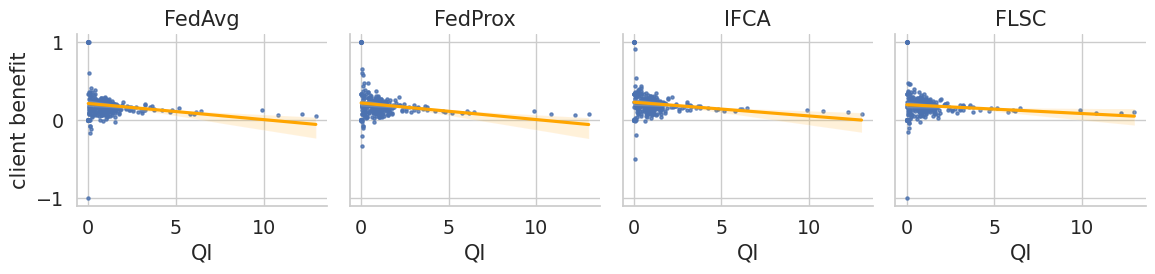

In [471]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10.png"))

In [472]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/quantity")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0    FedAvg   0.215297  1.756950e-38 -0.020646  0.011166  0.015106
1      FLSC   0.199594  6.177534e-40 -0.011311  0.123314  0.003846
2   FedProx   0.222097  3.307031e-42 -0.021294  0.007028  0.017382
3      IFCA   0.231864  3.178660e-47 -0.017644  0.020814  0.012081

In [473]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0    FedAvg   0.191518 -0.010072  0.254410 -0.009380  0.317861  0.347820   
1      FLSC   0.201076 -0.009780  0.231442 -0.004791  0.580979  0.073731   
2   FedProx   0.198266 -0.011878  0.168606 -0.006503  0.477810  0.297145   
3      IFCA   0.219650 -0.011930  0.157087 -0.005511  0.538091  0.190956   

      p_LDI   adj_Rsq  
0  0.000059  0.055026  
1  0.352192  0.001392  
2  0.000425  0.046480  
3  0.019851  0.022224

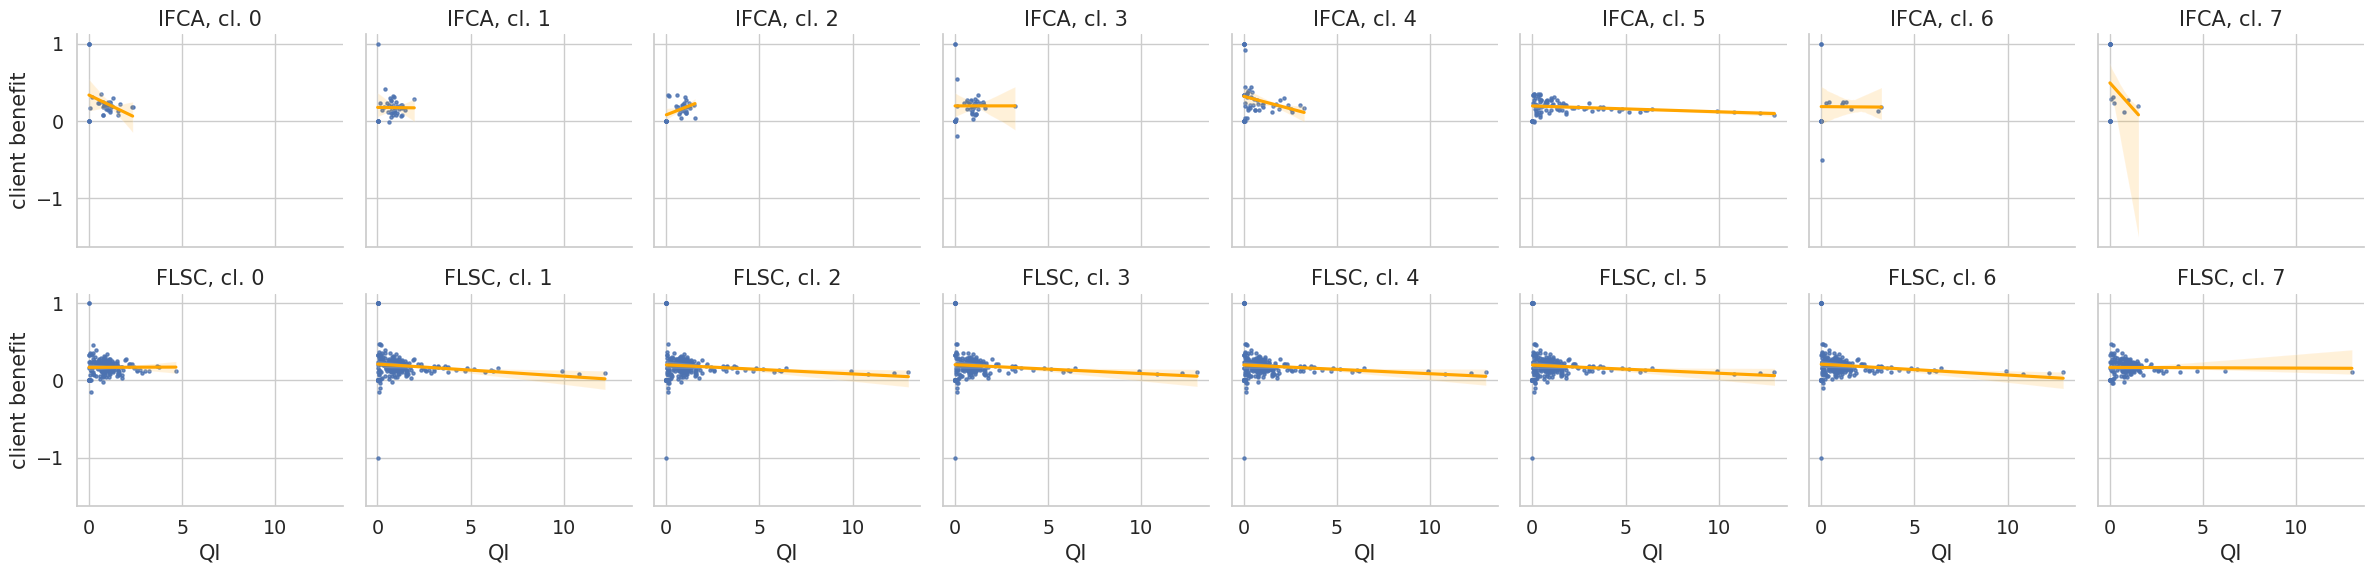

In [474]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_cifar10_clusters.png"))

### MNIST

In [475]:
conn = connect_to_run(BENEFIT_QUANTITY_MNIST)
data = get_run_relation(conn)

In [476]:
benefits = compute_client_benefit(conn, data)

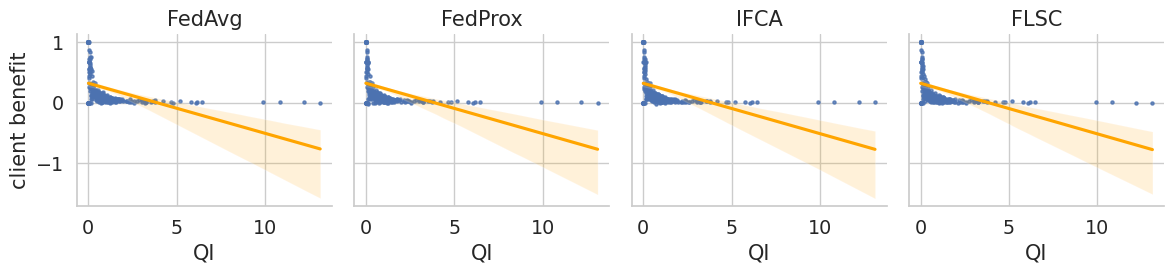

In [477]:
benefit_imbalance_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist.png"))

In [478]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/quantity")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0      IFCA   0.321089  1.023105e-43 -0.083232  4.588297e-13  0.133859
1   FedProx   0.323068  3.004148e-44 -0.083279  4.034882e-13  0.134471
2      FLSC   0.321692  7.471740e-44 -0.083626  3.585479e-13  0.135032
3    FedAvg   0.322065  2.014817e-44 -0.082807  4.022350e-13  0.134485

In [479]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/quantity")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      IFCA   0.100389 -0.027138  0.004064  0.015741  0.151258  1.498589   
1   FedProx   0.097332 -0.026804  0.004429  0.018220  0.095934  1.494176   
2      FLSC   0.097069 -0.027137  0.004005  0.017441  0.111332  1.499357   
3    FedAvg   0.092609 -0.027060  0.004415  0.022438  0.042390  1.447456   

          p_LDI   adj_Rsq  
0  4.950138e-43  0.491862  
1  5.091696e-43  0.492975  
2  3.580867e-43  0.494026  
3  1.837123e-40  0.477643

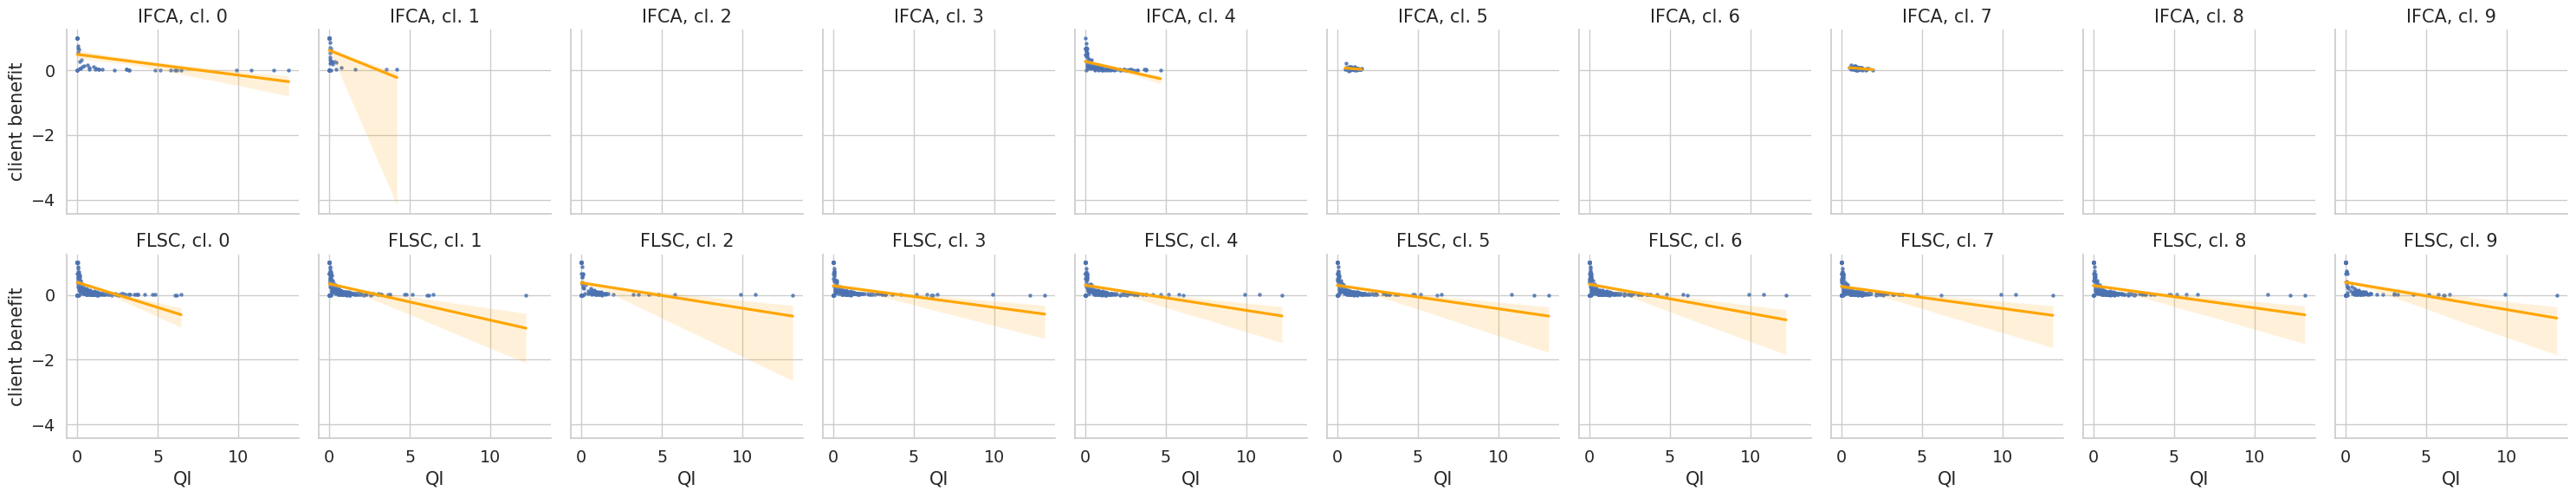

In [480]:
benefit_imbalance_cluster_plots(benefits, measure='quantity_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_quantity_imbalance_mnist_clusters.png"))

## Label (Distribution) Imbalance

### CIFAR-10

In [481]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [482]:
benefits = compute_client_benefit(conn, data)

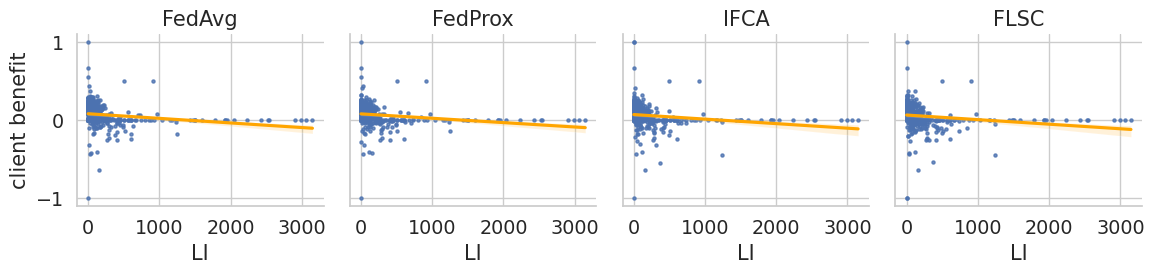

In [483]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

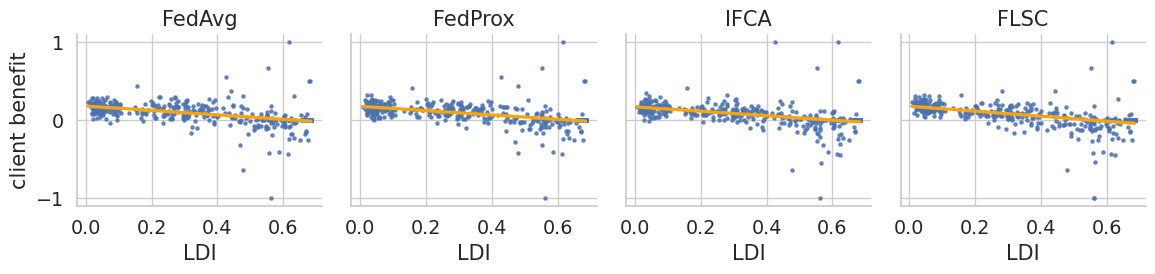

In [484]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [485]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/label")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0      FLSC   0.055670  2.084376e-08 -0.000661  0.922517 -0.002072
1    FedAvg   0.075265  4.175631e-16 -0.003567  0.566053 -0.001401
2      IFCA   0.065614  4.076110e-12 -0.004212  0.511584 -0.001188
3   FedProx   0.072815  2.297285e-16 -0.002152  0.717853 -0.001818

In [486]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on CIFAR-10/label")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      FLSC   0.271713 -0.081963  0.019739  0.000212  0.014925 -0.456684   
1    FedAvg   0.242582 -0.054574  0.095030  0.000135  0.095462 -0.368528   
2      IFCA   0.280170 -0.097579  0.004033  0.000241  0.004075 -0.437866   
3   FedProx   0.218687 -0.035476  0.253777  0.000090  0.240038 -0.335129   

          p_LDI   adj_Rsq  
0  1.512771e-13  0.278414  
1  1.148442e-10  0.252677  
2  1.978418e-13  0.248970  
3  6.793707e-10  0.262727

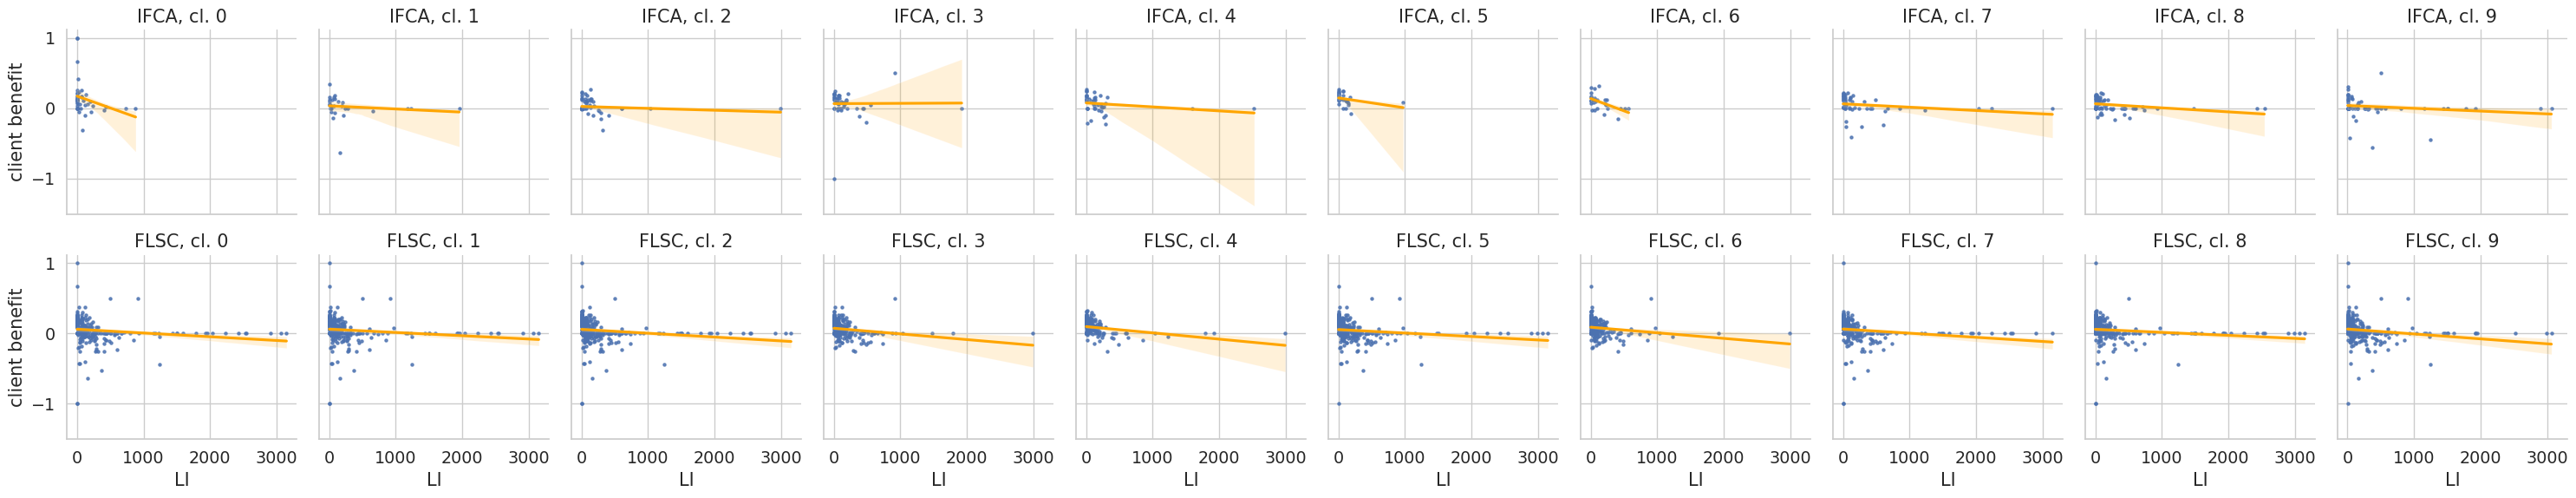

In [487]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10_clusters.png"))

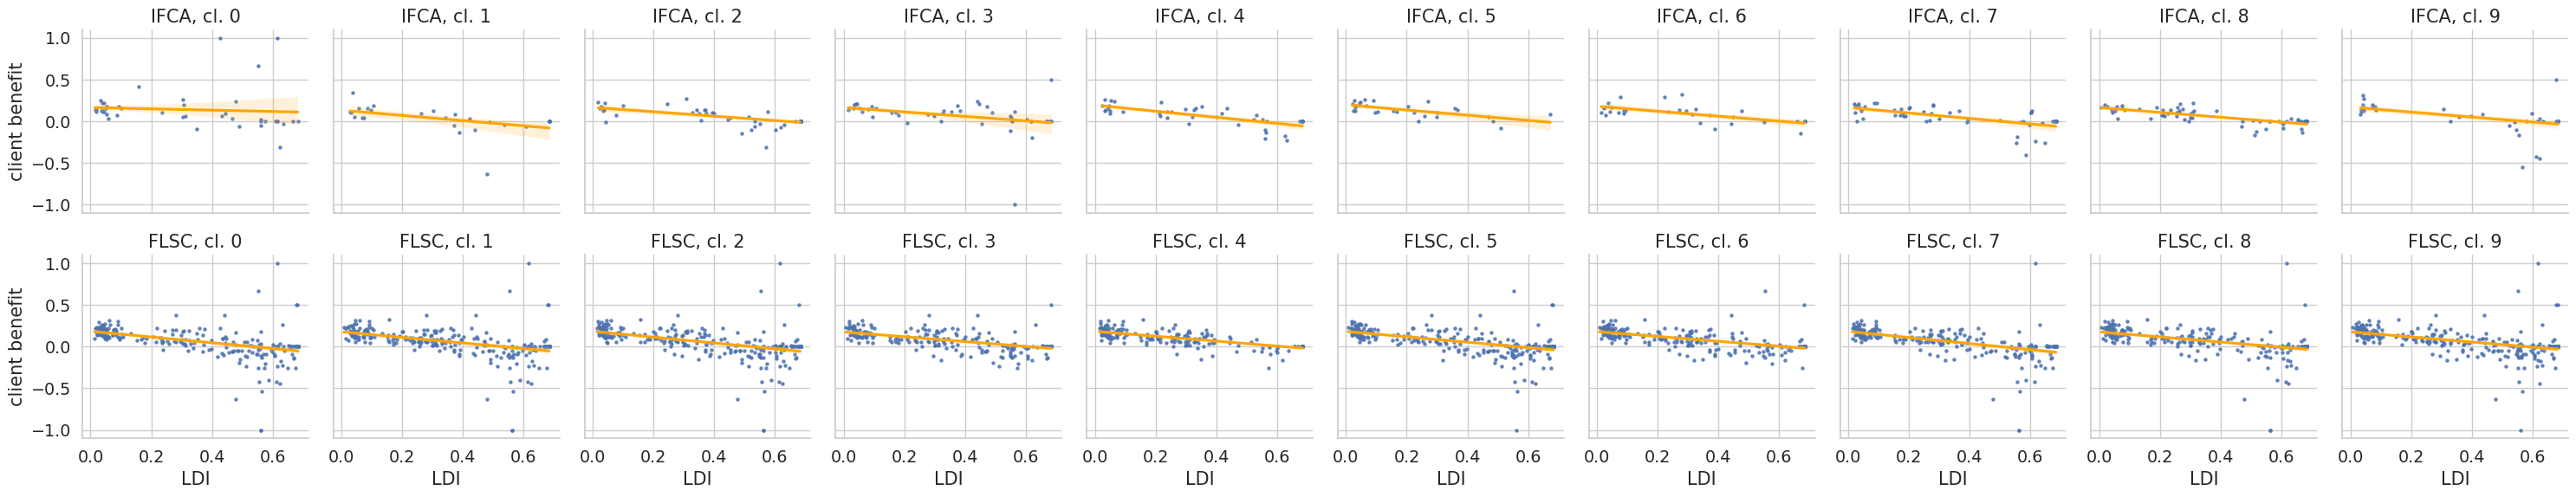

In [488]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [489]:
conn = connect_to_run(BENEFIT_LABEL_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [490]:
benefits = compute_client_benefit(conn, data)

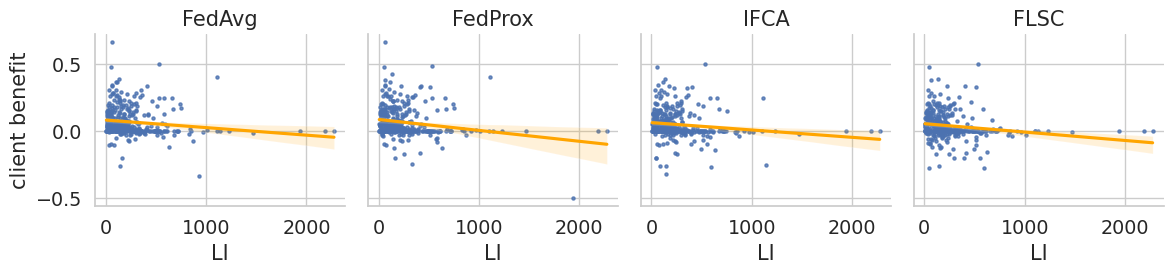

In [491]:
benefit_imbalance_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_cifar10.png"))

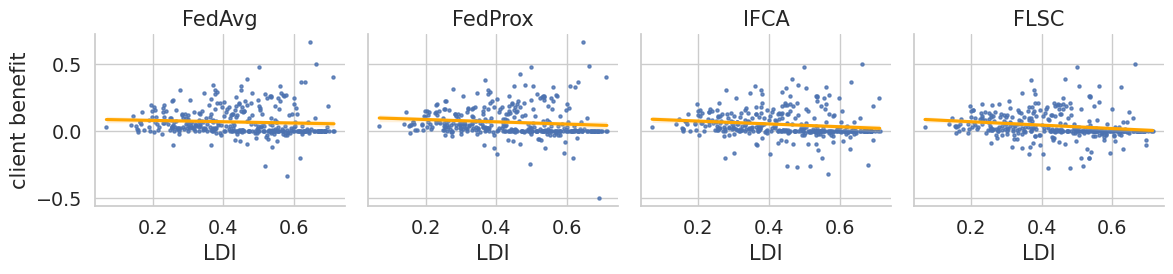

In [492]:
benefit_imbalance_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist.png"))

In [493]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/label")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0   FedProx   0.104380  3.442465e-17 -0.036549  0.000384  0.031963
1      FLSC   0.066181  7.830821e-10 -0.024776  0.006654  0.017652
2    FedAvg   0.098401  1.293929e-16 -0.028390  0.004040  0.020126
3      IFCA   0.072015  2.014813e-10 -0.020718  0.030360  0.010273

In [494]:
log_table(benefit_imbalance_reg_label(benefits), "Label Imbalance on MNIST/label")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0   FedProx   0.104687 -0.015032  0.612514 -0.000049  0.498767 -0.020781   
1      FLSC   0.150434 -0.048719  0.062630  0.000075  0.240776 -0.180535   
2    FedAvg   0.108151 -0.024922  0.384628 -0.000006  0.936479 -0.026702   
3      IFCA   0.124739 -0.027826  0.313766  0.000029  0.668528 -0.120309   

      p_LDI   adj_Rsq  
0  0.783875  0.034659  
1  0.007040  0.043788  
2  0.715120  0.016468  
3  0.088457  0.022781

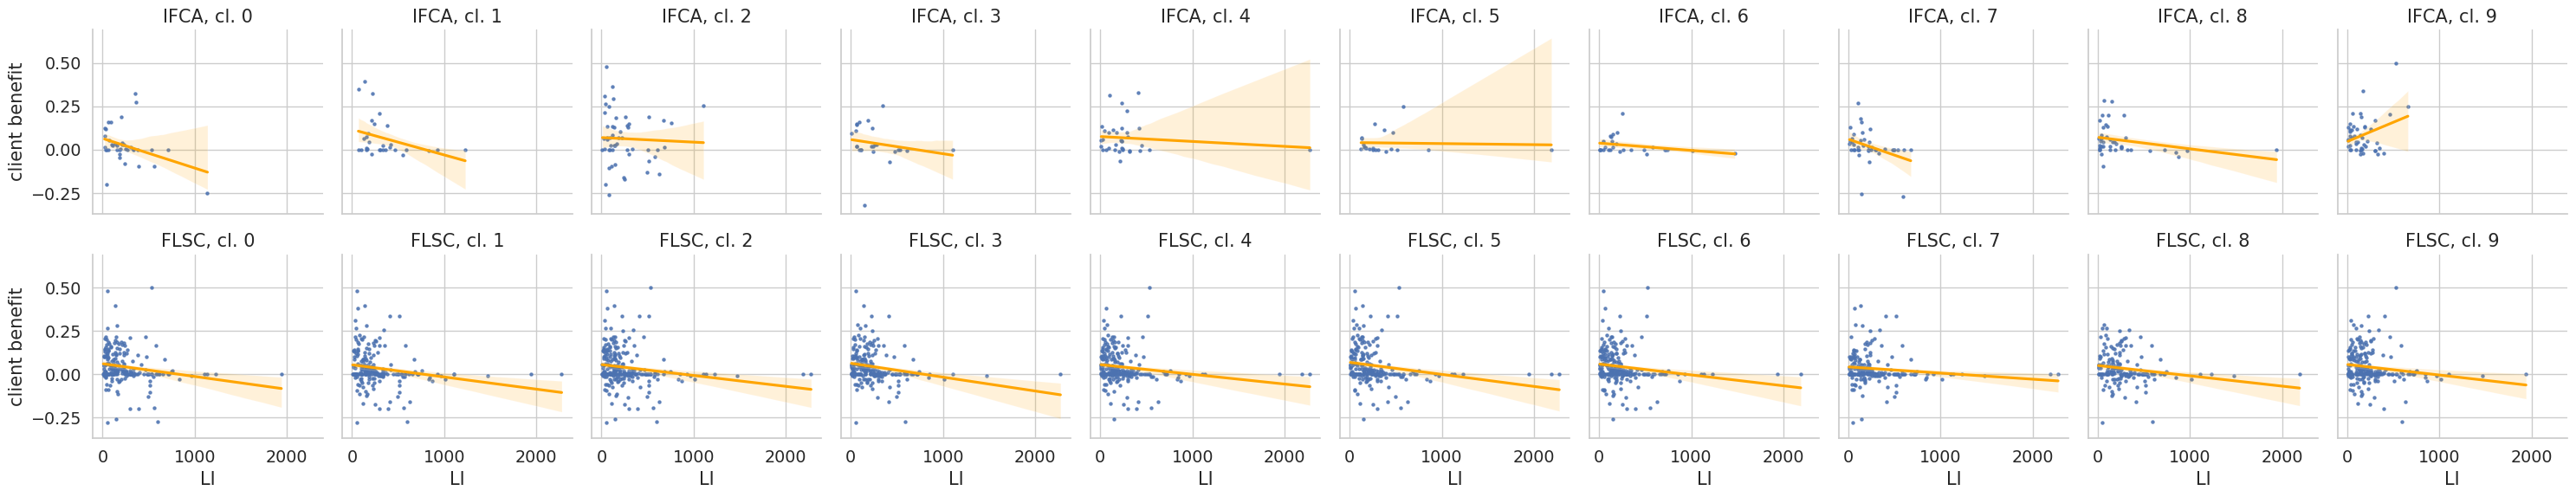

In [495]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_imbalance_mnist_clusters.png"))

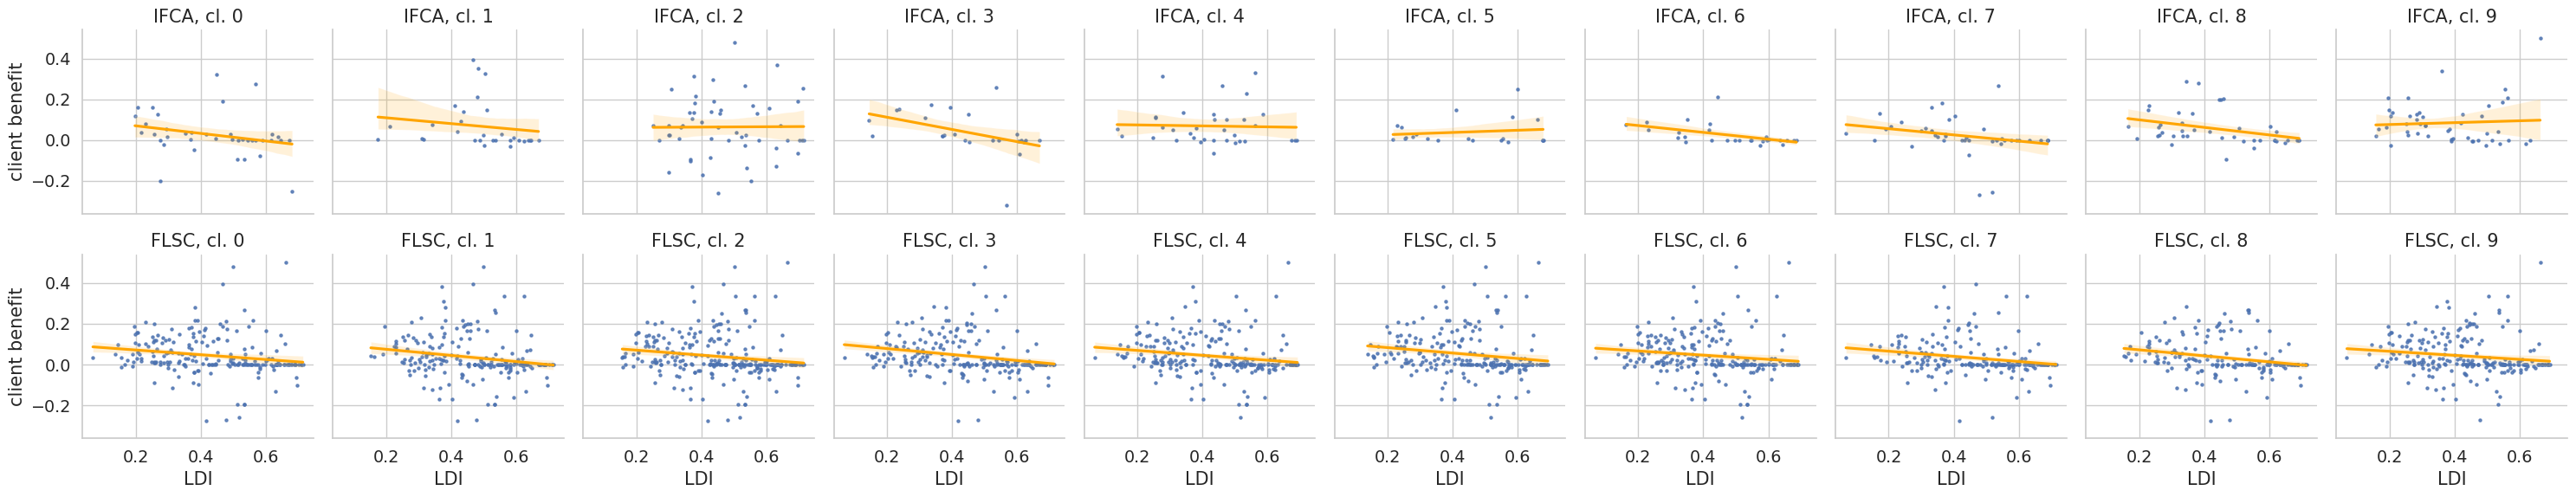

In [496]:
benefit_imbalance_cluster_plots(benefits, measure='label_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_label_distribution_imbalance_mnist_clusters.png"))

## Feature (Distribution) Imbalance

### CIFAR-10

In [497]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [498]:
benefits = compute_client_benefit(conn, data)

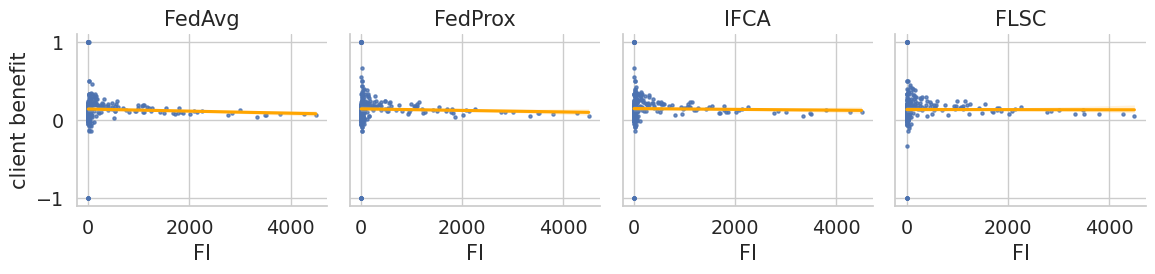

In [499]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10.png"))

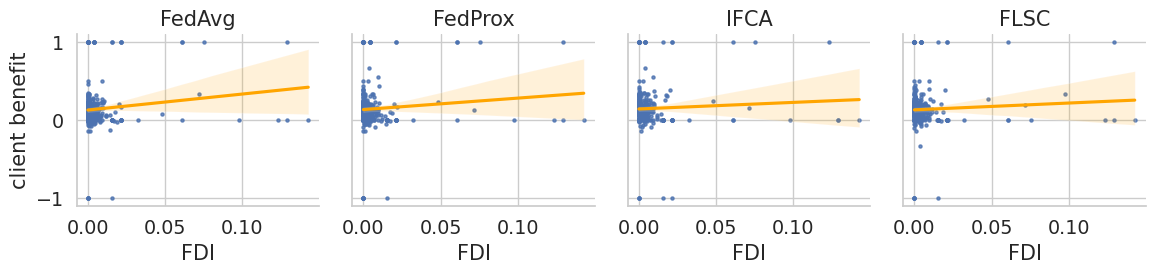

In [500]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [501]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on CIFAR-10/feature")

algorithm  intercept   p_intercept   beta_QI      p_QI   adj_Rsq
0      IFCA   0.158318  3.771644e-28 -0.009321  0.186353  0.001566
1   FedProx   0.153553  2.989572e-24 -0.009183  0.219520  0.001067
2      FLSC   0.144346  2.901616e-25 -0.006200  0.366001 -0.000379
3    FedAvg   0.152275  2.073894e-25 -0.010961  0.128755  0.002739

In [502]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on CIFAR-10/feature")

algorithm  intercept   beta_QI      p_QI   beta_LI      p_LI  beta_LDI  \
0      IFCA   0.168971 -0.041634  0.013866  0.000102  0.029985  0.550302   
1   FedProx   0.155375 -0.030003  0.094244  0.000070  0.163047  1.239832   
2      FLSC   0.151300 -0.031363  0.056756  0.000081  0.078710  0.664183   
3    FedAvg   0.151069 -0.032133  0.062270  0.000073  0.127643  1.797665   

      p_LDI   adj_Rsq  
0  0.482979  0.008920  
1  0.136851  0.006426  
2  0.384849  0.004135  
3  0.025011  0.015218

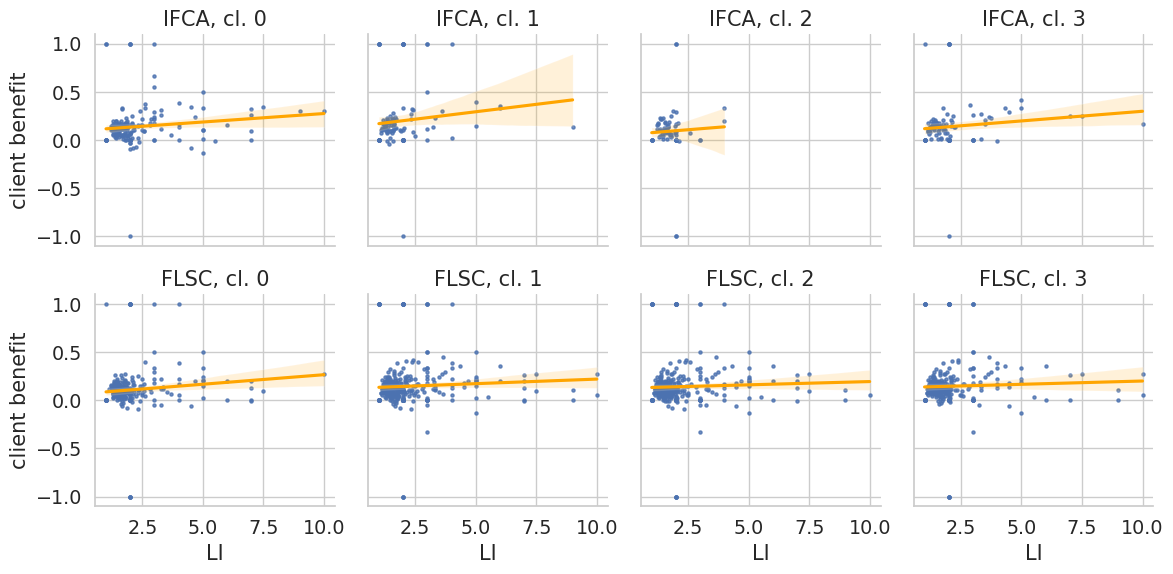

In [503]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10_clusters.png"))

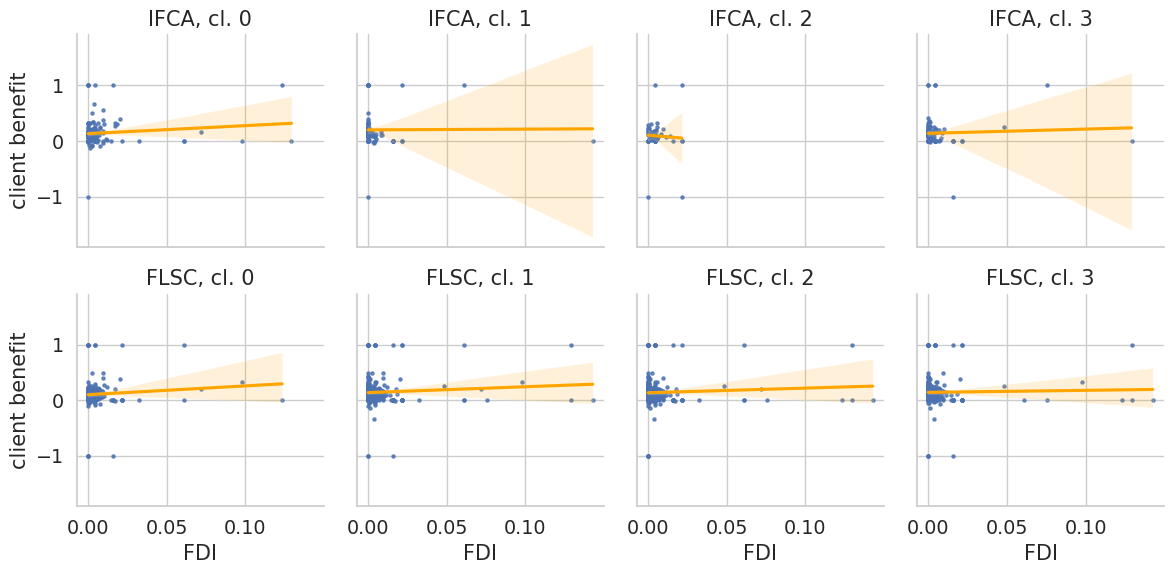

In [504]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_cifar10_clusters.png"))

### MNIST

In [505]:
conn = connect_to_run(BENEFIT_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [506]:
benefits = compute_client_benefit(conn, data)

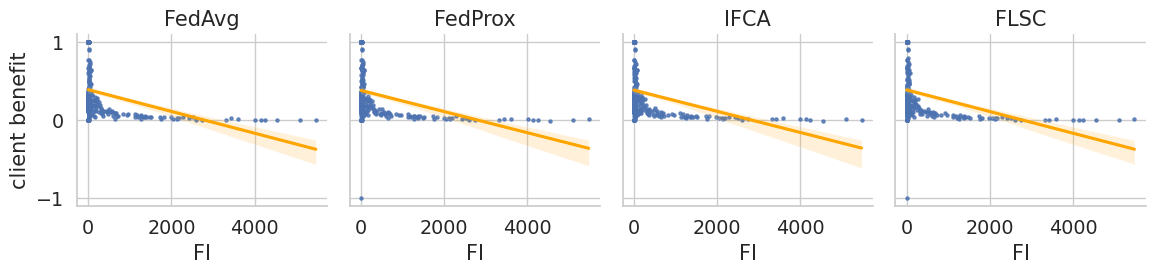

In [507]:
benefit_imbalance_plots(benefits, measure='feature_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_cifar10.png"))

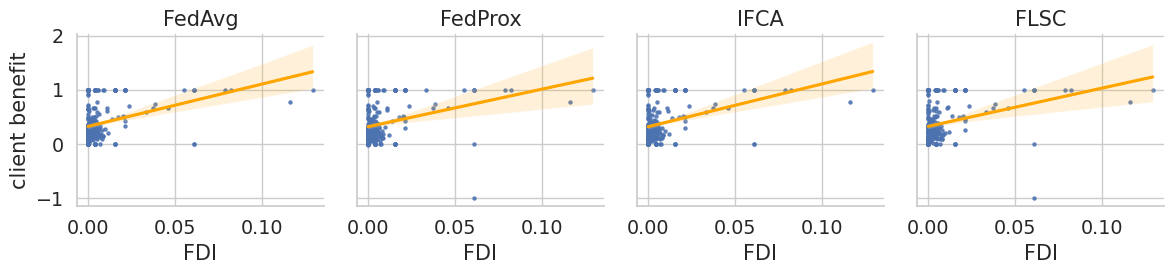

In [508]:
benefit_imbalance_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist.png"))

In [509]:
log_table(benefit_imbalance_reg_quantity(benefits), "Quantity Imbalance on MNIST/feature")

algorithm  intercept   p_intercept   beta_QI          p_QI   adj_Rsq
0   FedProx   0.443902  4.902865e-91 -0.091893  6.825852e-22  0.174336
1      FLSC   0.453324  8.583874e-94 -0.095041  3.064101e-23  0.184891
2    FedAvg   0.455519  1.088202e-97 -0.094340  5.248229e-24  0.190835
3      IFCA   0.448924  1.101762e-94 -0.093119  4.153184e-23  0.183863

In [510]:
log_table(benefit_imbalance_reg_feature(benefits), "Feature Imbalance on MNIST/feature")

algorithm  intercept   beta_QI          p_QI   beta_LI          p_LI  \
0   FedProx   0.472860 -0.210033  3.071257e-22  0.000318  7.352969e-11   
1      FLSC   0.485246 -0.220332  1.942234e-24  0.000337  4.260290e-12   
2    FedAvg   0.480274 -0.212621  2.443640e-24  0.000321  8.034121e-12   
3      IFCA   0.474327 -0.214071  2.674001e-24  0.000329  4.139033e-12   

   beta_LDI     p_LDI   adj_Rsq  
0  4.269423  0.000226  0.268984  
1  4.290217  0.000187  0.287546  
2  5.105865  0.000005  0.301847  
3  5.203686  0.000004  0.298512

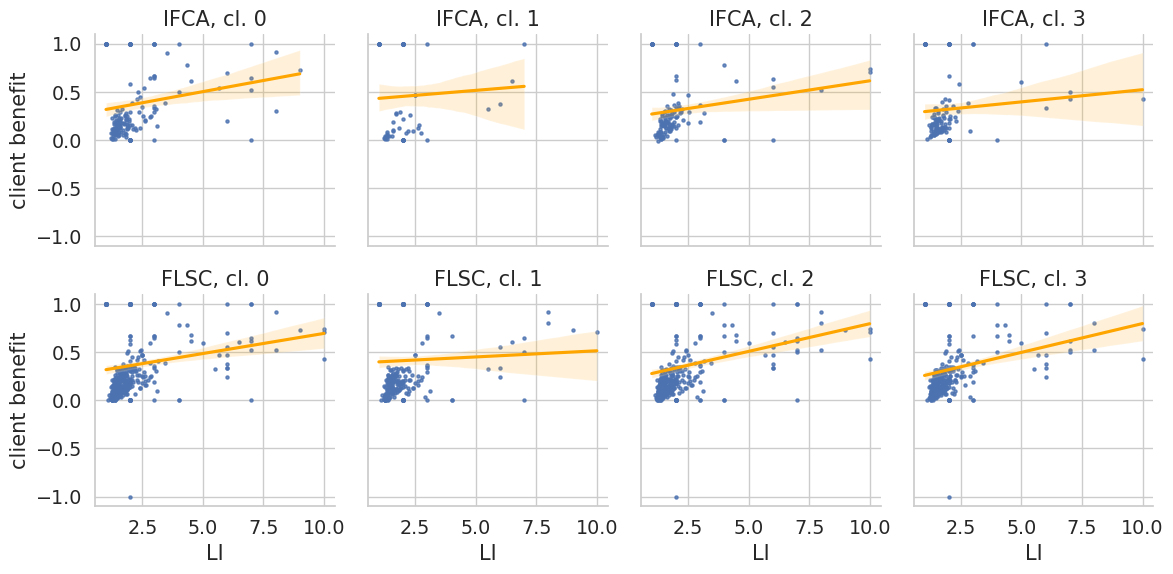

In [511]:
benefit_imbalance_cluster_plots(benefits, measure='label_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_imbalance_mnist_clusters.png"))

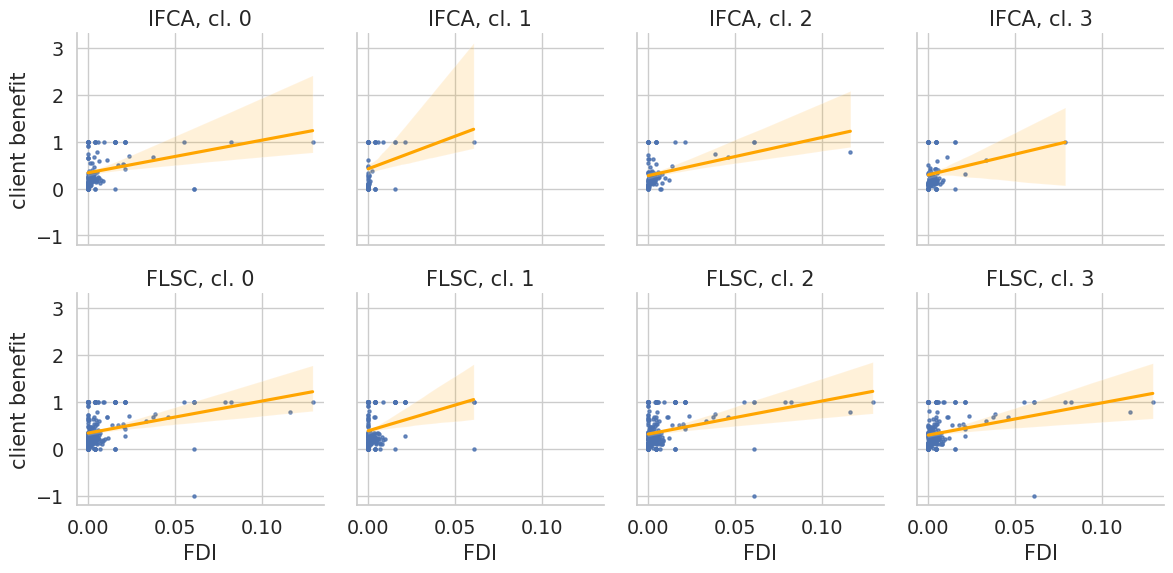

In [512]:
benefit_imbalance_cluster_plots(benefits, measure='feature_distribution_imbalance').savefig(os.path.join(OUTPUT_DIR, "benefits_feature_distribution_imbalance_mnist_clusters.png"))

# Client Contribution

## CIFAR-10

In [513]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_CIFAR)
data = get_run_relation(conn)

In [514]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

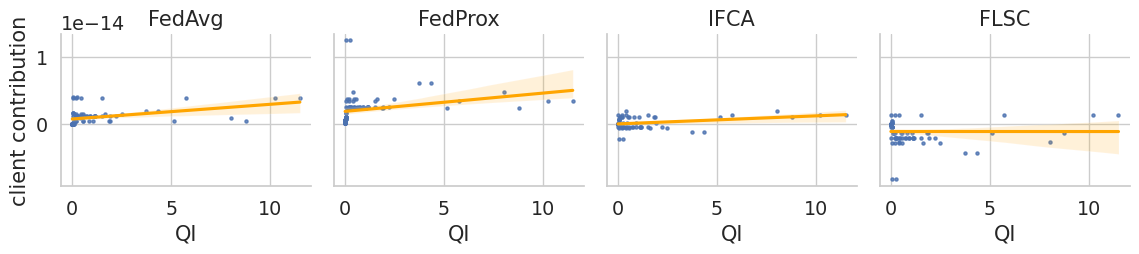

In [515]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_cifar10.png"))

### Feature Imbalance

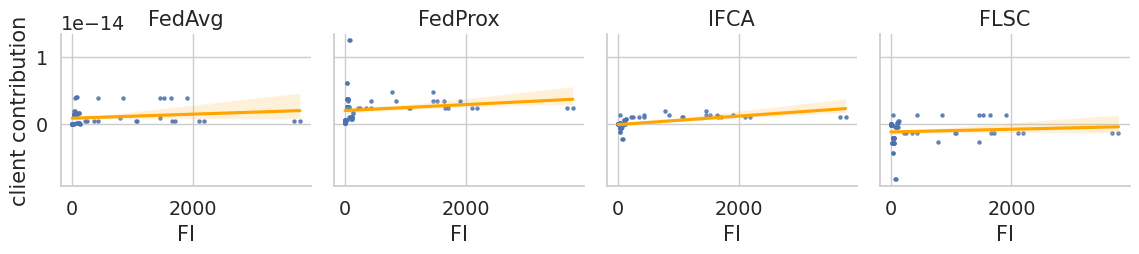

In [516]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_cifar10.png"))

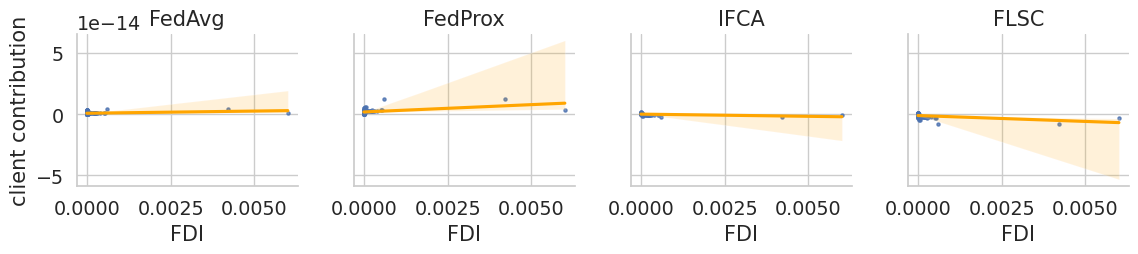

In [517]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_cifar10.png"))

In [518]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on CIFAR-10/feature")

algorithm     intercept   p_intercept       beta_QI      p_QI   adj_Rsq
0   FedProx  1.831444e-15  2.336855e-11  2.730455e-16  0.007825  0.067169
1      FLSC -1.176011e-15  5.070921e-08 -8.253995e-19  0.992060 -0.011362
2      IFCA -4.229440e-17  6.261715e-01  1.200100e-16  0.001361  0.100504
3    FedAvg  6.935074e-16  1.951070e-07  2.193427e-16  0.000051  0.161646

In [519]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on CIFAR-10/feature")

algorithm     intercept       beta_QI      p_QI       beta_LI          p_LI  \
0      IFCA -8.266312e-17  3.521997e-18  0.918124  6.000800e-19  5.043092e-08   
1   FedProx  1.559279e-15  2.830346e-16  0.008726  1.267426e-19  6.836484e-01   
2      FLSC -1.022658e-15 -6.475257e-17  0.465482  2.158456e-19  4.080784e-01   
3    FedAvg  6.178247e-16  2.345765e-16  0.000135 -2.613179e-20  8.799816e-01   

       beta_LDI     p_LDI   adj_Rsq  
0 -3.049186e-13  0.000366  0.427887  
1  1.268955e-12  0.000003  0.260657  
2 -9.587017e-13  0.000020  0.172715  
3  4.049361e-13  0.005205  0.217887

## MNIST

In [520]:
conn = connect_to_run(CONTRIBUTION_FEATURE_DISTRIBUTION_MNIST)
data = get_run_relation(conn)

In [521]:
contribution = compute_client_contribution(conn, data)

### Quantity Imbalance

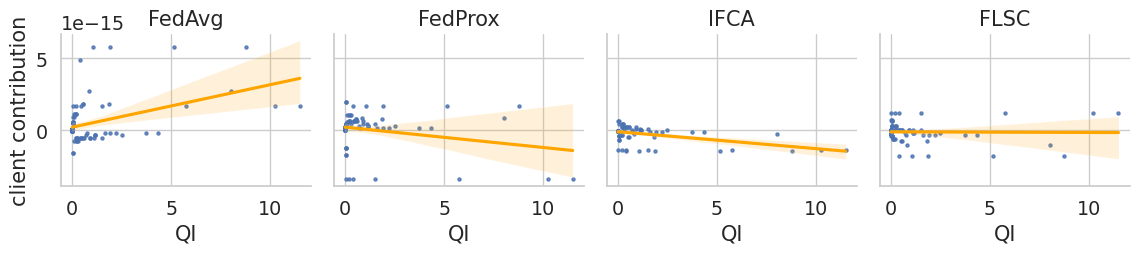

In [522]:
contribution_imbalance_plots(contribution, "quantity_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_quantity_imbalance_mnist.png"))

### Feature Imbalance

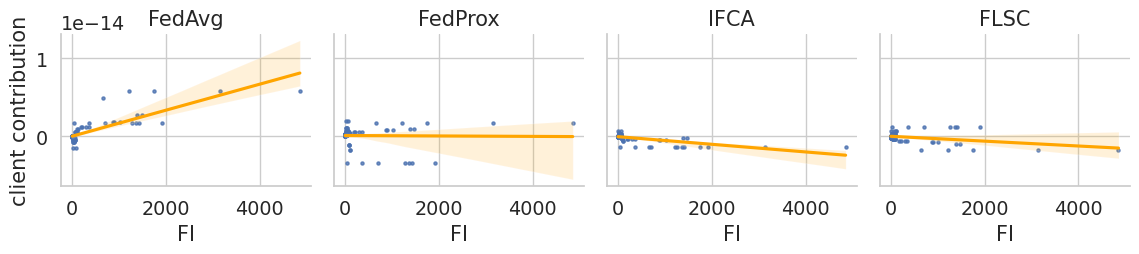

In [523]:
contribution_imbalance_plots(contribution, "feature_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_imbalance_mnist.png"))

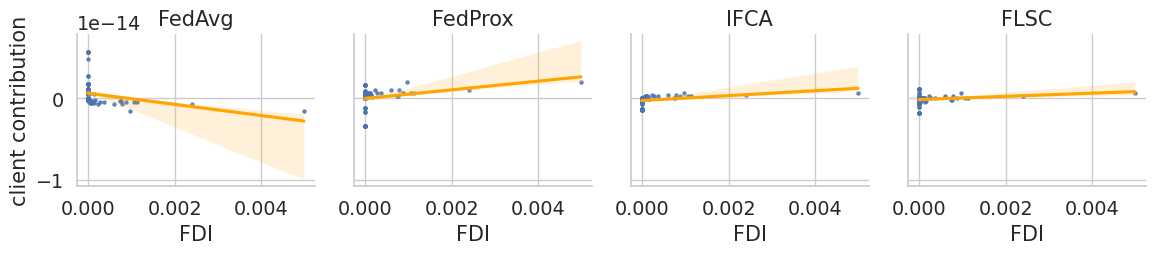

In [524]:
contribution_imbalance_plots(contribution, "feature_distribution_imbalance").savefig(os.path.join(OUTPUT_DIR, "contribution_feature_distribution_imbalance_mnist.png"))

In [525]:
log_table(contribution_imbalance_reg_quantity(contribution), "CONTRIB: Quantity Imbalance on MNIST/feature")

algorithm     intercept  p_intercept       beta_QI          p_QI   adj_Rsq
0      IFCA -8.662396e-17     0.107101 -1.175337e-16  9.735029e-07  0.231039
1    FedAvg  2.244001e-16     0.158659  2.943208e-16  2.541998e-05  0.174147
2      FLSC -9.674355e-17     0.191130 -4.410108e-18  8.864658e-01 -0.011128
3   FedProx  2.252177e-16     0.099633 -1.407174e-16  1.507057e-02  0.054668

In [526]:
log_table(contribution_imbalance_reg_feature(contribution), "CONTRIB: Feature Imbalance on MNIST/feature")

algorithm     intercept       beta_QI      p_QI       beta_LI          p_LI  \
0    FedAvg  1.518221e-16 -1.129545e-16  0.031530  1.845956e-18  7.851299e-20   
1      IFCA -9.638253e-17 -1.813541e-17  0.424259 -4.348334e-19  7.778621e-09   
2   FedProx  7.111978e-17 -2.214505e-16  0.002271  4.456856e-19  3.812531e-02   
3      FLSC -8.404960e-17  1.079823e-16  0.003098 -5.052256e-19  8.508381e-06   

       beta_LDI     p_LDI   adj_Rsq  
0 -4.947397e-13  0.000678  0.703620  
1  2.419945e-13  0.000162  0.535913  
2  5.185612e-13  0.008041  0.143717  
3  1.689024e-13  0.083072  0.209794